In [8]:
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from urllib.parse import urlencode
import json
from datetime import datetime, timedelta, date
import time

# Helpful site: https://api.inaturalist.org/v1/docs/#!/Observations/get_observations
# look for the taxon ids and place ids in the urls on the web site.

q = {
    "type": "collection",
    "sources": "projects",
    "per_page": 100,
     "page": 1,
}
#url = "https://api.inaturalist.org/v1/projects?q=BioBlitz&type=collection&per_page=30&order_by=created&page="
url = "https://api.inaturalist.org/v1/search?q=Bioblitz"


#del bioblitzProjects
bioblitzProjects = pd.DataFrame()

num_pages = 3

Define functions to retrieve observations, species, identifer and observer counts from iNaturalist

In [56]:
def fetchObservations(projectID):
  time.sleep(3)    
  url = "https://api.inaturalist.org/v1/observations?project_id="
  outputObs = requests.get(url+str(projectID))
  return(outputObs.json()["total_results"])

In [57]:
def fetchSpecies(projectID):
  time.sleep(3)
  url = "https://api.inaturalist.org/v1/observations/species_counts?project_id="
  outputSp = requests.get(url+str(projectID))
  return(outputSp.json()["total_results"])

In [58]:
def fetchIdentifiers(projectID):
  time.sleep(3)
  url = "https://api.inaturalist.org/v1/observations/identifiers?project_id="
  outputIde = requests.get(url+str(projectID))
  return(outputIde.json()["total_results"])

In [59]:
def fetchObservers(projectID):
  time.sleep(3)
  url = "https://api.inaturalist.org/v1/observations/observers?project_id="
  outputObservers = requests.get(url+str(projectID))
  return(outputObservers.json()["total_results"])

In [60]:
def fetchPlace(placeID):
    time.sleep(3)
    url = "https://api.inaturalist.org/v1/places/"
    outputPlace = requests.get(url+str(placeID))
    if outputPlace.json()["total_results"] == 1:
        return(outputPlace.json()["results"][0].get('location'))
    else:
        return 0

In [61]:
def parseDate(dateIn):

        dateOut = datetime.min

        if len(dateIn) == 15:
          dateOut=datetime.strptime(dateIn,'%Y-%m-%d %H:%M')
        elif len(dateIn) == 16:
          if re.search("^[1-2][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]/[0-9][0-9]:[0-9][0-9]$", dateIn): #2020-07-15/11:00
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d/%H:%M')
          elif re.search("^[1-2][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9][ ]24:00$", dateIn): #2020-08-16 24:00
            print("Bad end date ", dateIn, len(dateIn), key['field'])
          elif re.search("^[1-2][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]/[0-9][0-9]:[0-9][0-9]$", dateIn): #2020-07-15/11:00
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d/%H:%M')
          else:
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d %H:%M')
        elif len(dateIn) == 19:
          if "M" in dateIn or "m" in dateIn:
            if "/" in dateIn:
              dateOut=datetime.strptime(dateIn,'%Y-%m-%d/%I:%M %p')
            else:
              dateOut=datetime.strptime(dateIn,'%Y-%m-%d %I:%M %p')
          else:
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d %H:%M:%S')
        elif len(dateIn) == 10:
          if "/" in dateIn:
            if re.search("^[1-2][0-9][0-9][0-9]\/[0-9][0-9]\/[0-9][0-9]$", dateIn):
              dateOut=datetime.strptime(dateIn,'%Y/%m/%d')
            else:
              dateOut=datetime.strptime(dateIn,'%d/%m/%Y')
          else:
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d')
        elif len(dateIn) == 23:
          if "M" not in dateIn:
            dayTime = dateIn[0:16].strip()
            dateOut=datetime.strptime(dayTime,'%Y-%m-%d %H:%M')
          else:
            print("Bad end date ", dateIn, len(dateIn), key['field'])
        elif len(dateIn) == 25:
          if "T" in dateIn:
            dayTime = dateIn[0:16]
            dateOut=datetime.strptime(dayTime,'%Y-%m-%dT%H:%M') #2014-03-28T00:00
          else:
            dayTime = dateIn[0:16]
            dateOut=datetime.strptime(dayTime,'%Y-%m-%d %H:%M')
        else:
          print("Bad start date ", dateIn, len(dateIn), key['field'])
        return dateOut



In [15]:
# get all the project from iNaturalist

page = int(1)
while True:
    r = requests.get(url, params=q)
    bioblitzProjects = pd.concat([bioblitzProjects, pd.DataFrame(r.json()["results"])], sort=False)

    #if r.json()["results"] == []:
    #    print("no more results, stopping")
    #    break
    if page > num_pages:
      break
    if page == 1:
        num_pages = int(r.json()["total_results"] / r.json()["per_page"])+1
        print(r.json()["total_results"])
        print(num_pages)
        print("Results:", r.json()["total_results"], ", ", num_pages, " pages total")
    print("Retrieving page ", url+" page " + str(page))
    page += 1
    q["page"] = page
    time.sleep(1)

5623
57
Results: 5623 ,  57  pages total
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 1
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 2
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 3
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 4
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 5
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 6
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 7
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 8
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 9
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 10
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 11
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 12
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 13
Retrie

In [62]:
projects =  bioblitzProjects["record"]

In [63]:
count = 0
beginning = datetime.min
ending = datetime.min
lastdate = datetime.now()

year = 2012

#The start and end dates are in all sorts of formats, probably related to the locale of the computer where they were created.
#This means they all have to be parsed. Some have just one data and other none at all.
#Projects with no dates will be dropped.
#The projects with dates that cannot be parsed will be printed out.

projectDetails = pd.DataFrame(columns=['projectID','createdAt','slug', 'placeID','rulePreferences', 'project_type', 'observationRule', 'searchParameters', 'start', 'end', 'duration', 'hours', 'observations', 'identifiers', 'observers', 'species', 'isUmbrella', 'description', 'location'])

for index, value in projects.items():
    print("Project ID ",value['id'])
    print("Slug ",value['slug'])
    beginning = datetime.min
    ending = datetime.min
    count += 1
    if count > 5600: #just for debugging to restrict the time it takes
      break
    for key in value['search_parameters']:
      if key['field'] == 'd1':
        beginning = parseDate(key['value'])
        print("d1 ",key['value'])
      elif key['field'] == 'd2':
        ending = parseDate(key['value'])
        print("d2 ",key['value'])
    print("ending ",ending)
    print("beginning ",beginning)
    print("diff - ",ending-beginning)
    if((ending-beginning) < timedelta(days = 10) and ending < lastdate) and isinstance(value['place_id'], int) and ending > beginning:
      dfTemp = pd.DataFrame({"projectID":[value['id']], "createdAt":[value['created_at']], "searchParameters":[value['search_parameters']], "start":[beginning], "end":[ending], "duration":[ending-beginning], "hours":[(((ending-beginning).days)*24) + (((ending-beginning).seconds)/3600)],
                            "slug":[value['slug']], "placeID":[value['place_id']], "rulePreferences":[value['rule_preferences']], "project_type":[value['project_type']],
                            "observationRule":[value['project_observation_rules']], "isUmbrella":[value['is_umbrella']], "description":[value['description']], "location":fetchPlace(value['place_id']),
                            'observations':fetchObservations(value['id']), 'identifiers':fetchIdentifiers(value['id']), 'observers':fetchObservers(value['id']), 'species':fetchSpecies(value['id'])})
      projectDetails = projectDetails.append(dfTemp, ignore_index=True)
      print(count, " - ", value['slug'], " ", ending-beginning, ", ", ((ending-beginning).seconds)/3600, ", ", value['place_id'], ", ",ending.year)
      time.sleep(10)
    print("Count = ", count)

Project ID  3438
Slug  personal-bioblitz-spring-2015
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1
Project ID  79
Slug  ohio-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2
Project ID  12302
Slug  virtual-bioblitz-virtuel
d1  2017-05-22T12:00:00-04:00
d2  2017-10-31T12:00:00-04:00
ending  2017-10-31 12:00:00
beginning  2017-05-22 12:00:00
diff -  162 days, 0:00:00
Count =  3
Project ID  40
Slug  global-reptile-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4
Project ID  65853
Slug  personal-bioblitz-spring-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5
Project ID  10802
Slug  personal-bioblitz-spring-2017
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  6
Project ID  1670
Slug  golden-gate-national-parks-bioblitz-march-28th-and-29th-2014
d1  2014-03-28T00:00:00-07:00
d2  2014-0

D:\Documents\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


7  -  golden-gate-national-parks-bioblitz-march-28th-and-29th-2014   1 day, 23:59:00 ,  23.983333333333334 ,  9912 ,  2014
Count =  7
Project ID  17671
Slug  personal-bioblitz-spring-2018
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  8
Project ID  13
Slug  global-amphibian-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  9
Project ID  33965
Slug  personal-bioblitz-spring-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  10
Project ID  6810
Slug  2016-national-parks-bioblitz-nps-servicewide
d1  2016-01-01
d2  2016-12-31
ending  2016-12-31 00:00:00
beginning  2016-01-01 00:00:00
diff -  365 days, 0:00:00
Count =  11
Project ID  6218
Slug  personal-bioblitz-spring-2016
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  12
Project ID  275
Slug  biodiversity-survey-on-the-mt-tamalpais-watershed
ending  0001-01-01 00:00:00
beginning  0001-0

Count =  49
Project ID  7718
Slug  the-cape-perpetua-bioblitz-series
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  50
Project ID  5689
Slug  spring-virtual-bioblitz-oklahoma
d1  2016-04-01
d2  2016-05-01
ending  2016-05-01 00:00:00
beginning  2016-04-01 00:00:00
diff -  30 days, 0:00:00
Count =  51
Project ID  7110
Slug  2016-national-parks-bioblitz-washington-d-c
d1  2016-05-20
d2  2016-05-21
ending  2016-05-21 00:00:00
beginning  2016-05-20 00:00:00
diff -  1 day, 0:00:00
52  -  2016-national-parks-bioblitz-washington-d-c   1 day, 0:00:00 ,  0.0 ,  97462 ,  2016
Count =  52
Project ID  15076
Slug  longwood-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  53
Project ID  20606
Slug  bioblitz-lombardia-2018
d1  2018-05-18
d2  2018-06-06
ending  2018-06-06 00:00:00
beginning  2018-05-18 00:00:00
diff -  19 days, 0:00:00
Count =  54
Project ID  9107
Slug  2016-texas-pollinator-bioblitz
d1  2016-10-07
d2  201

87  -  2016-national-parks-bioblitz-gateway-jamaica-bay-bioblitz   1 day, 0:00:00 ,  0.0 ,  69314 ,  2016
Count =  87
Project ID  6435
Slug  2016-national-parks-bioblitz-death-valley-discovering-life-on-the-edge-71162a33-482e-40e4-9b9a-5c08a7433e92
d1  2016-03-12
d2  2016-03-12
ending  2016-03-12 00:00:00
beginning  2016-03-12 00:00:00
diff -  0:00:00
Count =  88
Project ID  12281
Slug  passamaquoddy-bay-baie-passamaquoddy-bioblitz
d1  2017-05-29
d2  2017-10-31
ending  2017-10-31 00:00:00
beginning  2017-05-29 00:00:00
diff -  155 days, 0:00:00
Count =  89
Project ID  6344
Slug  mclaren-park-bioblitz-2016
d1  2016-04-16
d2  2016-04-16
ending  2016-04-16 00:00:00
beginning  2016-04-16 00:00:00
diff -  0:00:00
Count =  90
Project ID  18151
Slug  wis-bioblitz
d1  2018-03-02T08:00:00-10:00
d2  2018-03-02T14:00:00-10:00
ending  2018-03-02 14:00:00
beginning  2018-03-02 08:00:00
diff -  6:00:00
91  -  wis-bioblitz   6:00:00 ,  6.0 ,  124509 ,  2018
Count =  91
Project ID  17529
Slug  anahuac

128  -  parks-canada-bioblitz-2017-pacific-rim-bioblitz-2017-de-parcs-canada-pacific-rim   1 day, 0:00:00 ,  0.0 ,  68850 ,  2017
Count =  128
Project ID  24453
Slug  rocky-top-bioblitz-utk-dlia
d1  2018-10-10
d2  2018-10-12
ending  2018-10-12 00:00:00
beginning  2018-10-10 00:00:00
diff -  2 days, 0:00:00
129  -  rocky-top-bioblitz-utk-dlia   2 days, 0:00:00 ,  0.0 ,  128616 ,  2018
Count =  129
Project ID  14936
Slug  rare-norval-community-bioblitz-bioblitz-communautaire-de-rare-norval
d1  2017-10-01T06:00:00-04:00
d2  2017-10-01T18:00:00-04:00
ending  2017-10-01 18:00:00
beginning  2017-10-01 06:00:00
diff -  12:00:00
130  -  rare-norval-community-bioblitz-bioblitz-communautaire-de-rare-norval   12:00:00 ,  12.0 ,  122021 ,  2017
Count =  130
Project ID  10295
Slug  sitka-big-year-project
d1  2017-01-01T00:00:00-09:00
d2  2017-12-31T23:59:00-09:00
ending  2017-12-31 23:59:00
beginning  2017-01-01 00:00:00
diff -  364 days, 23:59:00
Count =  131
Project ID  13091
Slug  keji-bioblitz-

Count =  158
Project ID  6254
Slug  candlestick-point-bioblitz
d1  2016-05-21
d2  2016-05-21
ending  2016-05-21 00:00:00
beginning  2016-05-21 00:00:00
diff -  0:00:00
Count =  159
Project ID  14855
Slug  ongoing-penang-hill-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  160
Project ID  6790
Slug  2016-national-parks-bioblitz-wings-across-south-carolina
d1  2016-05-20
d2  2016-05-21
ending  2016-05-21 00:00:00
beginning  2016-05-20 00:00:00
diff -  1 day, 0:00:00
161  -  2016-national-parks-bioblitz-wings-across-south-carolina   1 day, 0:00:00 ,  0.0 ,  43 ,  2016
Count =  161
Project ID  3020
Slug  king-mountain-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  162
Project ID  5123
Slug  academy-of-science-st-louis-bioblitz-at-shaw-nature-reserve
d1  2015-09-18
d2  2015-09-20
ending  2015-09-20 00:00:00
beginning  2015-09-18 00:00:00
diff -  2 days, 0:00:00
163  -  academy-of-science-st-louis-biob

194  -  lincoln-bioblitz-2017   1 day, 1:45:00 ,  1.75 ,  119878 ,  2017
Count =  194
Project ID  17645
Slug  mt-sutro-bioblitz
d1  2018-03-18
d2  2018-03-18
ending  2018-03-18 00:00:00
beginning  2018-03-18 00:00:00
diff -  0:00:00
Count =  195
Project ID  10579
Slug  bluestem-prairie-open-space-colorado-springs-parks-and-recreation-2017-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  196
Project ID  7440
Slug  2016-national-parks-bioblitz-little-river-canyon
d1  2016-05-20
d2  2016-05-22
ending  2016-05-22 00:00:00
beginning  2016-05-20 00:00:00
diff -  2 days, 0:00:00
197  -  2016-national-parks-bioblitz-little-river-canyon   2 days, 0:00:00 ,  0.0 ,  95234 ,  2016
Count =  197
Project ID  64552
Slug  bioblitz-uagm-gurabo-2020
d1  2020-01-25T23:00:00-05:00
d2  2020-04-27T00:00:00-04:00
ending  2020-04-27 00:00:00
beginning  2020-01-25 23:00:00
diff -  92 days, 1:00:00
Count =  198
Project ID  11708
Slug  stark-parks-bioblitz-fry-family-pa

228  -  onondaga-lake-bioblitz   1 day, 17:59:00 ,  17.983333333333334 ,  66057 ,  2014
Count =  228
Project ID  21903
Slug  cbg-field-work-bioblitz
d1  2018-05-27T12:00:00-05:00
d2  2018-09-30T15:12:00-05:00
ending  2018-09-30 15:12:00
beginning  2018-05-27 12:00:00
diff -  126 days, 3:12:00
Count =  229
Project ID  7299
Slug  2016-national-parks-bioblitz-kenilworth
d1  2016-05-20
d2  2016-05-21
ending  2016-05-21 00:00:00
beginning  2016-05-20 00:00:00
diff -  1 day, 0:00:00
230  -  2016-national-parks-bioblitz-kenilworth   1 day, 0:00:00 ,  0.0 ,  97464 ,  2016
Count =  230
Project ID  11484
Slug  lsp-glacial-lakes-region-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  231
Project ID  24358
Slug  point-pelee-100-bioblitz-bioblitz-de-pointe-pelee-100
d1  2018-07-21T12:00:00-04:00
d2  2018-07-22T12:00:00-04:00
ending  2018-07-22 12:00:00
beginning  2018-07-21 12:00:00
diff -  1 day, 0:00:00
232  -  point-pelee-100-bioblitz-bioblitz-de-point

264  -  mimosa-rocks-national-park-bioblitz-2014   3 days, 22:00:00 ,  22.0 ,  68540 ,  2014
Count =  264
Project ID  6684
Slug  bioblitz-santa-margarita-er-2016
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  265
Project ID  7302
Slug  2016-national-parks-bioblitz-rock-creek-park
d1  2016-05-20
d2  2016-05-21
ending  2016-05-21 00:00:00
beginning  2016-05-20 00:00:00
diff -  1 day, 0:00:00
266  -  2016-national-parks-bioblitz-rock-creek-park   1 day, 0:00:00 ,  0.0 ,  97467 ,  2016
Count =  266
Project ID  28809
Slug  split-oak-forest-fall-bioblitz-2018
d1  2018-10-26
d2  2018-10-28
ending  2018-10-28 00:00:00
beginning  2018-10-26 00:00:00
diff -  2 days, 0:00:00
267  -  split-oak-forest-fall-bioblitz-2018   2 days, 0:00:00 ,  0.0 ,  118974 ,  2018
Count =  267
Project ID  11061
Slug  ventana-wilderness-alliance-bioblitz-milpitas-sia
d1  2017-04-14
d2  2017-04-16
ending  2017-04-16 00:00:00
beginning  2017-04-14 00:00:00
diff -  2 days, 0:00:00
268

297  -  bioblitz-oklahoma-2016   1 day, 3:00:00 ,  3.0 ,  114014 ,  2016
Count =  297
Project ID  2482
Slug  24-hour-bioblitz
d1  2014-09-19T00:00:00-04:00
d2  2014-09-20T00:00:00-04:00
ending  2014-09-20 00:00:00
beginning  2014-09-19 00:00:00
diff -  1 day, 0:00:00
298  -  24-hour-bioblitz   1 day, 0:00:00 ,  0.0 ,  64957 ,  2014
Count =  298
Project ID  12807
Slug  coyote-run-farm
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  299
Project ID  4500
Slug  san-pedro-valley-bioblitz-2015
d1  2015-09-26T07:00:00-07:00
d2  2015-09-26T23:30:00-07:00
ending  2015-09-26 23:30:00
beginning  2015-09-26 07:00:00
diff -  16:30:00
300  -  san-pedro-valley-bioblitz-2015   16:30:00 ,  16.5 ,  3190 ,  2015
Count =  300
Project ID  38007
Slug  hijh-bioblitz
d1  2019-03-28
d2  2019-05-24
ending  2019-05-24 00:00:00
beginning  2019-03-28 00:00:00
diff -  57 days, 0:00:00
Count =  301
Project ID  12232
Slug  csa-2017-conference-bioblitz-st-paul
d1  2017-05-16
d2  201

334  -  spring-2018-bioblitz-tookany-tacony-frankford-watershed   8 days, 0:00:00 ,  0.0 ,  122839 ,  2018
Count =  334
Project ID  13124
Slug  blitzing-the-moraine-2017-nobleton-bioblitz
d1  2017-07-08
d2  2017-07-09
ending  2017-07-09 00:00:00
beginning  2017-07-08 00:00:00
diff -  1 day, 0:00:00
335  -  blitzing-the-moraine-2017-nobleton-bioblitz   1 day, 0:00:00 ,  0.0 ,  120896 ,  2017
Count =  335
Project ID  18799
Slug  fish-creek-bioblitz-2018
d1  2018-06-22
d2  2018-06-29
ending  2018-06-29 00:00:00
beginning  2018-06-22 00:00:00
diff -  7 days, 0:00:00
336  -  fish-creek-bioblitz-2018   7 days, 0:00:00 ,  0.0 ,  125555 ,  2018
Count =  336
Project ID  35603
Slug  pinnacles-national-park-2019-bioblitz
d1  2019-05-04
d2  2019-05-05
ending  2019-05-05 00:00:00
beginning  2019-05-04 00:00:00
diff -  1 day, 0:00:00
337  -  pinnacles-national-park-2019-bioblitz   1 day, 0:00:00 ,  0.0 ,  5737 ,  2019
Count =  337
Project ID  7939
Slug  judd-creek-bioblitz-2016
d1  2016-06-24
d2  20

369  -  city-nature-challenge-2018-briones-bioblitz   12:00:00 ,  12.0 ,  3706 ,  2018
Count =  369
Project ID  10571
Slug  blodgett-open-space-colorado-springs-parks-and-recreation-2017-bioblitz-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  370
Project ID  28111
Slug  team-imagine-crow-island-bioblitz-2018
d1  2018-10-05
d2  2018-10-16
ending  2018-10-16 00:00:00
beginning  2018-10-05 00:00:00
diff -  11 days, 0:00:00
Count =  371
Project ID  5074
Slug  tejon-ranch-conservancy-invertebrate-bioblitz
d1  2015-08-21T12:00:00-07:00
d2  2015-08-22T12:00:00-07:00
ending  2015-08-22 12:00:00
beginning  2015-08-21 12:00:00
diff -  1 day, 0:00:00
372  -  tejon-ranch-conservancy-invertebrate-bioblitz   1 day, 0:00:00 ,  0.0 ,  90101 ,  2015
Count =  372
Project ID  12619
Slug  pigeon-point-bioblitz-2017
d1  2017-06-28T07:00:00-07:00
d2  2017-06-28T12:00:00-07:00
ending  2017-06-28 12:00:00
beginning  2017-06-28 07:00:00
diff -  5:00:00
373  -  pige

404  -  citizen-science-association-2015-san-jose-bioblitz   4 days, 15:00:00 ,  15.0 ,  76555 ,  2015
Count =  404
Project ID  7665
Slug  pelican-cove-mpa-bioblitz-2016
d1  2016-06-05T00:00:00-07:00
d2  2016-06-15T00:00:00-07:00
ending  2016-06-15 00:00:00
beginning  2016-06-05 00:00:00
diff -  10 days, 0:00:00
Count =  405
Project ID  15845
Slug  phoenix-lake-ma-bioblitz-10-26-a-block
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  406
Project ID  12856
Slug  snapshot-cal-coast-2017-frenchman-s-reef-bioblitz
d1  2017-06-24
d2  2017-06-24
ending  2017-06-24 00:00:00
beginning  2017-06-24 00:00:00
diff -  0:00:00
Count =  407
Project ID  24427
Slug  wildcat-hills-bioblitz-2018
d1  2018-07-19T09:54:00-06:00
d2  2018-07-24T09:54:00-06:00
ending  2018-07-24 09:54:00
beginning  2018-07-19 09:54:00
diff -  5 days, 0:00:00
408  -  wildcat-hills-bioblitz-2018   5 days, 0:00:00 ,  0.0 ,  128590 ,  2018
Count =  408
Project ID  44824
Slug  kingsboro-forest-bi

Count =  439
Project ID  19420
Slug  parks-canada-bioblitz-2018-fort-rodd-hill-bioblitz-2018-de-fort-rodd-hill-5510ead5-4739-45c3-a57e-2ab21d3e8c89
d1  2018-01-01T23:00:59-08:00
d2  2018-12-31T22:59:59-08:00
ending  2018-12-31 22:59:00
beginning  2018-01-01 23:00:00
diff -  363 days, 23:59:00
Count =  440
Project ID  6364
Slug  snapshot-cal-coast-2016
d1  2016-06-01
d2  2016-06-12
ending  2016-06-12 00:00:00
beginning  2016-06-01 00:00:00
diff -  11 days, 0:00:00
Count =  441
Project ID  1117
Slug  asbury-woods-nature-center-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  442
Project ID  1984
Slug  mount-washington-bioblitz-2014
d1  2014-06-06T01:00:00-04:00
d2  2014-06-07T23:00:00-04:00
ending  2014-06-07 23:00:00
beginning  2014-06-06 01:00:00
diff -  1 day, 22:00:00
443  -  mount-washington-bioblitz-2014   1 day, 22:00:00 ,  22.0 ,  63796 ,  2014
Count =  443
Project ID  18487
Slug  bioblitz-at-cbec-school-program
d1  2018-01-01T11:00:00-

474  -  coyote-valley-1st-bioblitz   6 days, 23:59:00 ,  23.983333333333334 ,  120167 ,  2017
Count =  474
Project ID  6318
Slug  brook-mini-bioblitz
d1  2016-02-27T09:00:00+13:00
d2  2016-02-28T09:00:00+13:00
ending  2016-02-28 09:00:00
beginning  2016-02-27 09:00:00
diff -  1 day, 0:00:00
475  -  brook-mini-bioblitz   1 day, 0:00:00 ,  0.0 ,  40493 ,  2016
Count =  475
Project ID  7107
Slug  2016-national-parks-bioblitz-southern-california-coastal
d1  2016-05-20
d2  2016-05-21
ending  2016-05-21 00:00:00
beginning  2016-05-20 00:00:00
diff -  1 day, 0:00:00
476  -  2016-national-parks-bioblitz-southern-california-coastal   1 day, 0:00:00 ,  0.0 ,  4715 ,  2016
Count =  476
Project ID  8841
Slug  tcnj-bioblitz
d1  2016-08-30
d2  2016-09-30
ending  2016-09-30 00:00:00
beginning  2016-08-30 00:00:00
diff -  31 days, 0:00:00
Count =  477
Project ID  7159
Slug  clark-county-wetlands-park-bioblitz-2016
d1  2016-04-29T17:30:00-07:00
d2  2016-04-30T23:30:00-07:00
ending  2016-04-30 23:30:00


508  -  charlie-w-painter-bioblitz-2017   2 days, 0:00:00 ,  0.0 ,  121160 ,  2017
Count =  508
Project ID  90820
Slug  ucsblooms-bioblitz-november-7-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  509
Project ID  7568
Slug  fitzgerald-marine-reserve-bioblitz
d1  2016-06-09T07:00:00-07:00
d2  2016-06-09T13:00:00-07:00
ending  2016-06-09 13:00:00
beginning  2016-06-09 07:00:00
diff -  6:00:00
510  -  fitzgerald-marine-reserve-bioblitz   6:00:00 ,  6.0 ,  92426 ,  2016
Count =  510
Project ID  7565
Slug  pillar-point-reef-bioblitz
d1  2016-06-06T05:30:00-07:00
d2  2016-06-06T10:00:00-07:00
ending  2016-06-06 10:00:00
beginning  2016-06-06 05:30:00
diff -  4:30:00
511  -  pillar-point-reef-bioblitz   4:30:00 ,  4.5 ,  49984 ,  2016
Count =  511
Project ID  4311
Slug  tva-raven-rock-nc-bioblitz
d1  2015-06-20
d2  2015-06-20
ending  2015-06-20 00:00:00
beginning  2015-06-20 00:00:00
diff -  0:00:00
Count =  512
Project ID  7946
Slug  tartu-mini-biobl

546  -  berkshire-bioblitz-2018   1 day, 0:00:00 ,  0.0 ,  821 ,  2018
Count =  546
Project ID  7132
Slug  mcclellan-ranch-preserve-bioblitz
d1  2016-05-01
d2  2016-05-01
ending  2016-05-01 00:00:00
beginning  2016-05-01 00:00:00
diff -  0:00:00
Count =  547
Project ID  15027
Slug  nhmla-bioblitz-stoneview-nature-center-2017
d1  2017-09-23T09:00:00-07:00
d2  2017-09-23T14:00:00-07:00
ending  2017-09-23 14:00:00
beginning  2017-09-23 09:00:00
diff -  5:00:00
548  -  nhmla-bioblitz-stoneview-nature-center-2017   5:00:00 ,  5.0 ,  122077 ,  2017
Count =  548
Project ID  11541
Slug  piedmont-wildlife-center-s-bioblitz-2017
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  549
Project ID  34386
Slug  wellington-botanic-garden-bioblitz-2019-secrets-of-the-garden
d1  2019-04-05T15:00:00+13:00
d2  2019-04-06T16:00:00+13:00
ending  2019-04-06 16:00:00
beginning  2019-04-05 15:00:00
diff -  1 day, 1:00:00
550  -  wellington-botanic-garden-bioblitz-2019-secrets-o

580  -  mont-avic-bioblitz-2018   2 days, 21:56:00 ,  21.933333333333334 ,  137586 ,  2018
Count =  580
Project ID  17918
Slug  woodlake-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  581
Project ID  12644
Slug  thornton-academy-bioblitz
d1  2017-06-02T04:00:00+00:00
d2  2017-06-03T04:00:00+00:00
ending  2017-06-03 04:00:00
beginning  2017-06-02 04:00:00
diff -  1 day, 0:00:00
Count =  582
Project ID  18551
Slug  pelican-cove-mpa-bioblitz-2018
d1  2018-06-18
d2  2018-06-18
ending  2018-06-18 00:00:00
beginning  2018-06-18 00:00:00
diff -  0:00:00
Count =  583
Project ID  26273
Slug  central-methodist-university-bioblitz-2018
d1  2018-09-10T08:00:00-07:00
d2  2018-09-30T21:00:00-07:00
ending  2018-09-30 21:00:00
beginning  2018-09-10 08:00:00
diff -  20 days, 13:00:00
Count =  584
Project ID  9260
Slug  rutgers-newark-njit-bioblitz-5th-annual-2016
d1  2016-09-28
d2  2016-09-28
ending  2016-09-28 00:00:00
beginning  2016-09-28 00:00:00
diff -

620  -  biol-181-bioblitz-2018   1 day, 11:00:00 ,  11.0 ,  110294 ,  2018
Count =  620
Project ID  18580
Slug  2018-virtual-bioblitz-cypress-hills-interprovincial-park
d1  2018-07-15
d2  2018-07-21
ending  2018-07-21 00:00:00
beginning  2018-07-15 00:00:00
diff -  6 days, 0:00:00
621  -  2018-virtual-bioblitz-cypress-hills-interprovincial-park   6 days, 0:00:00 ,  0.0 ,  120294 ,  2018
Count =  621
Project ID  3120
Slug  bioblitz-2015-rhododendron-preserve
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  622
Project ID  18758
Slug  2018-osu-citizen-science-day-bioblitz
d1  2018-04-18
d2  2018-04-18
ending  2018-04-18 00:00:00
beginning  2018-04-18 00:00:00
diff -  0:00:00
Count =  623
Project ID  10928
Slug  2017-amargosa-river-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  624
Project ID  18330
Slug  bioblitz-kapowairua-2018
d1  2018-03-24
d2  2018-03-28
ending  2018-03-28 00:00:00
beginning  2018-03-24 

657  -  rinhs-bioblitz-2018   1 day, 0:00:00 ,  0.0 ,  127025 ,  2018
Count =  657
Project ID  13131
Slug  pikes-peak-ten-bioblitz-june-19-23-2017
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  658
Project ID  8322
Slug  ray-miller-khs-fall-bioblitz-2016
d1  2016-09-27
d2  2016-09-30
ending  2016-09-30 00:00:00
beginning  2016-09-27 00:00:00
diff -  3 days, 0:00:00
Count =  659
Project ID  1831
Slug  snap-duke-university-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  660
Project ID  4075
Slug  mexico-global-snapshot-of-biodiversity-2015
d1  2015-05-15
d2  2015-05-25
ending  2015-05-25 00:00:00
beginning  2015-05-15 00:00:00
diff -  10 days, 0:00:00
Count =  661
Project ID  5029
Slug  2015-cibolo-nature-center-farm-bioblitz
d1  2015-10-05
d2  2015-10-10
ending  2015-10-10 00:00:00
beginning  2015-10-05 00:00:00
diff -  5 days, 0:00:00
662  -  2015-cibolo-nature-center-farm-bioblitz   5 days, 0:00:00 ,  0.

Count =  693
Project ID  6827
Slug  2016-national-parks-bioblitz-hot-springs-reptilian-roundup-and-fungus-find
d1  2016-05-20
d2  2016-05-21
ending  2016-05-21 00:00:00
beginning  2016-05-20 00:00:00
diff -  1 day, 0:00:00
694  -  2016-national-parks-bioblitz-hot-springs-reptilian-roundup-and-fungus-find   1 day, 0:00:00 ,  0.0 ,  56706 ,  2016
Count =  694
Project ID  11993
Slug  okitu-scenic-reserve-bioblitz-2017
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  695
Project ID  44284
Slug  ucsblooms-bioblitz-june-7-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  696
Project ID  12571
Slug  upham-woods-bioblitz-2017
d1  2017-05-26T15:00:00-05:00
d2  2017-05-27T21:00:00-05:00
ending  2017-05-27 21:00:00
beginning  2017-05-26 15:00:00
diff -  1 day, 6:00:00
Count =  697
Project ID  9043
Slug  travis-country-flora-fauna
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  698
Project

731  -  bioblitz-workshop-at-cas   3:00:00 ,  3.0 ,  75752 ,  2018
Count =  731
Project ID  11561
Slug  siena-bioblitz
d1  2017-04-24T09:00:00-04:00
d2  2017-04-24T12:00:00-04:00
ending  2017-04-24 12:00:00
beginning  2017-04-24 09:00:00
diff -  3:00:00
Count =  732
Project ID  15298
Slug  2017-2018-insect-bioblitz-lucy-school
d1  2017-10-04
d2  2017-10-06
ending  2017-10-06 00:00:00
beginning  2017-10-04 00:00:00
diff -  2 days, 0:00:00
733  -  2017-2018-insect-bioblitz-lucy-school   2 days, 0:00:00 ,  0.0 ,  97394 ,  2017
Count =  733
Project ID  14945
Slug  bio102-2ps-tuesday-inwood-bioblitz
d1  2017-09-26T14:00:00-04:00
d2  2017-09-27T17:00:00-04:00
ending  2017-09-27 17:00:00
beginning  2017-09-26 14:00:00
diff -  1 day, 3:00:00
Count =  734
Project ID  7886
Slug  bioblitz-at-the-la-jolla-tidepools
d1  2016-06-10
d2  2016-06-10
ending  2016-06-10 00:00:00
beginning  2016-06-10 00:00:00
diff -  0:00:00
Count =  735
Project ID  7533
Slug  sfcn-bisc-bioblitz
d1  2016-05-27T08:00:00-0

768  -  green-hairstreak-corridor-bioblitz-2017   4:00:00 ,  4.0 ,  113121 ,  2017
Count =  768
Project ID  6457
Slug  2016-national-parks-bioblitz-jean-lafitte-bugblitz
d1  2016-05-06
d2  2016-05-06
ending  2016-05-06 00:00:00
beginning  2016-05-06 00:00:00
diff -  0:00:00
Count =  769
Project ID  10772
Slug  community-forester-bioblitz-2017
d1  2017-03-11
d2  2017-03-11
ending  2017-03-11 00:00:00
beginning  2017-03-11 00:00:00
diff -  0:00:00
Count =  770
Project ID  48590
Slug  fall-2019-sfasu-for-255-vertebrate-natural-history
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  771
Project ID  6285
Slug  davis-elementary-school-schoolyard-bioblitz
d1  2016-01-01T00:00:00-07:00
d2  2016-12-31T00:00:00-07:00
ending  2016-12-31 00:00:00
beginning  2016-01-01 00:00:00
diff -  365 days, 0:00:00
Count =  772
Project ID  19224
Slug  wetlands-park-bioblitz-2018
d1  2018-04-28T06:00:00-07:00
d2  2018-04-28T20:00:00-07:00
ending  2018-04-28 20:00:00
beginning

807  -  ucla-bioblitz-2017-city-nature-challenge   2 days, 0:00:00 ,  0.0 ,  120076 ,  2017
Count =  807
Project ID  38867
Slug  mill-ridge-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  808
Project ID  6979
Slug  2016-national-parks-bioblitz-glacier-wildlife-observations
d1  2016-05-01
d2  2016-09-30
ending  2016-09-30 00:00:00
beginning  2016-05-01 00:00:00
diff -  152 days, 0:00:00
Count =  809
Project ID  4721
Slug  oliver-reservoir-bioblitz
d1  2016-06-16
d2  2016-07-31
ending  2016-07-31 00:00:00
beginning  2016-06-16 00:00:00
diff -  45 days, 0:00:00
Count =  810
Project ID  11792
Slug  aoc-bioblitz-challenge-spring-2017
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  811
Project ID  1381
Slug  central-park-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  812
Project ID  7912
Slug  2016-rhodes-island-natural-history-survey-bioblitz-hopkinton-ri
d1  2016-0

847  -  bioblitz-owahalimun   8 days, 0:00:00 ,  0.0 ,  31755 ,  2018
Count =  847
Project ID  16998
Slug  lindblad-expeditions-south-georgia-bioblitz-ex71732
d1  2017-10-31
d2  2017-11-14
ending  2017-11-14 00:00:00
beginning  2017-10-31 00:00:00
diff -  14 days, 0:00:00
Count =  848
Project ID  24303
Slug  reinstein-woods-bioblitz-2018
d1  2018-08-24T12:48:00-04:00
d2  2018-08-31
ending  2018-08-31 00:00:00
beginning  2018-08-24 12:48:00
diff -  6 days, 11:12:00
849  -  reinstein-woods-bioblitz-2018   6 days, 11:12:00 ,  11.2 ,  95676 ,  2018
Count =  849
Project ID  13128
Slug  snapshot-cal-coast-2017-stearn-s-wharf-sb-harbor-bioblitz
d1  2017-06-26
d2  2017-06-26
ending  2017-06-26 00:00:00
beginning  2017-06-26 00:00:00
diff -  0:00:00
Count =  850
Project ID  19350
Slug  hawthorn-park-bioblitz-spring-2018
d1  2018-04-26T08:00:00+00:00
d2  2018-04-27T19:00:00+00:00
ending  2018-04-27 19:00:00
beginning  2018-04-26 08:00:00
diff -  1 day, 11:00:00
851  -  hawthorn-park-bioblitz-spr

Count =  882
Project ID  19453
Slug  rembrandt-college-bioblitz-kwintelooyen
d1  2018-05-14
d2  2018-05-17
ending  2018-05-17 00:00:00
beginning  2018-05-14 00:00:00
diff -  3 days, 0:00:00
Count =  883
Project ID  88561
Slug  sfa-tws-fall-2020-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  884
Project ID  6421
Slug  ncsu-campus-bioblitz
d1  2015-07-15
d2  2016-07-14
ending  2016-07-14 00:00:00
beginning  2015-07-15 00:00:00
diff -  365 days, 0:00:00
Count =  885
Project ID  12867
Slug  esf-bioblitz
d1  2017-06-06T01:00:00+00:00
d2  2017-06-07T09:00:00+00:00
ending  2017-06-07 09:00:00
beginning  2017-06-06 01:00:00
diff -  1 day, 8:00:00
Count =  886
Project ID  6860
Slug  2016-national-parks-bioblitz-sequoia-and-kings-canyon
d1  2016-05-20
d2  2016-05-21
ending  2016-05-21 00:00:00
beginning  2016-05-20 00:00:00
diff -  1 day, 0:00:00
887  -  2016-national-parks-bioblitz-sequoia-and-kings-canyon   1 day, 0:00:00 ,  0.0 ,  97419 ,  2016
Co

921  -  glenallan-at-brookside-bioblitz   1 day, 0:00:00 ,  0.0 ,  117291 ,  2018
Count =  921
Project ID  4741
Slug  canadian-wildlife-federation-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  922
Project ID  7558
Slug  powell-butte-ecoblitz-2016
d1  2016-05-21T00:00:01-07:00
d2  2016-05-24T23:59:59-07:00
ending  2016-05-24 23:59:00
beginning  2016-05-21 00:00:00
diff -  3 days, 23:59:00
923  -  powell-butte-ecoblitz-2016   3 days, 23:59:00 ,  23.983333333333334 ,  111342 ,  2016
Count =  923
Project ID  14695
Slug  sustainability-day-bioblitz-wellesley-college
d1  2017-09-11T00:30:00-10:00
d2  2017-09-11T12:00:00-10:00
ending  2017-09-11 12:00:00
beginning  2017-09-11 00:30:00
diff -  11:30:00
924  -  sustainability-day-bioblitz-wellesley-college   11:30:00 ,  11.5 ,  121943 ,  2017
Count =  924
Project ID  45091
Slug  museum-of-science-butterfly-bioblitz-2019
d1  2019-07-01T12:00:00+00:00
d2  2019-08-15T12:00:00+00:00
ending  2019-08-15 

955  -  florida-wma-watermelon-pond-wea-bioblitz   7 days, 0:00:00 ,  0.0 ,  118979 ,  2017
Count =  955
Project ID  29625
Slug  city-nature-challenge-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  956
Project ID  22952
Slug  snapshot-cal-coast-2018-catalina-west-end-bioblitz
d1  2018-06-18T08:00:00-08:00
d2  2018-06-20T11:23:00-07:00
ending  2018-06-20 11:23:00
beginning  2018-06-18 08:00:00
diff -  2 days, 3:23:00
957  -  snapshot-cal-coast-2018-catalina-west-end-bioblitz   2 days, 3:23:00 ,  3.3833333333333333 ,  4570 ,  2018
Count =  957
Project ID  11741
Slug  glacier-national-park-bioblitz-2017
d1  2017-05-01
d2  2017-10-31
ending  2017-10-31 00:00:00
beginning  2017-05-01 00:00:00
diff -  183 days, 0:00:00
Count =  958
Project ID  6962
Slug  carmacks-bioblitz
d1  2016-06-20T12:00:00-07:00
d2  2016-06-30T12:00:00-07:00
ending  2016-06-30 12:00:00
beginning  2016-06-20 12:00:00
diff -  10 days, 0:00:00
Count =  959
Project ID  11975
Slug  

995  -  brooks-biodiversity-bioblitz-2016   8 days, 0:00:00 ,  0.0 ,  97394 ,  2016
Count =  995
Project ID  14067
Slug  wildwood-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  996
Project ID  17746
Slug  klang-valley-city-nature-challenge-2018
d1  2018-04-27
d2  2018-04-30
ending  2018-04-30 00:00:00
beginning  2018-04-27 00:00:00
diff -  3 days, 0:00:00
997  -  klang-valley-city-nature-challenge-2018   3 days, 0:00:00 ,  0.0 ,  124354 ,  2018
Count =  997
Project ID  22158
Slug  eisenhower-park-june-9-high-line-canal-bioblitz
d1  2018-06-09T08:00:00-06:00
d2  2018-06-16T00:00:00-06:00
ending  2018-06-16 00:00:00
beginning  2018-06-09 08:00:00
diff -  6 days, 16:00:00
998  -  eisenhower-park-june-9-high-line-canal-bioblitz   6 days, 16:00:00 ,  16.0 ,  127178 ,  2018
Count =  998
Project ID  15221
Slug  bioblitz-cali-2017
d1  2017-10-21
d2  2018-01-21
ending  2018-01-21 00:00:00
beginning  2017-10-21 00:00:00
diff -  92 days, 0:00:00
Count

Count =  1033
Project ID  22106
Slug  banks-island-bioblitz-2018
d1  2018-07-01T14:14:00-06:00
d2  2018-07-31T14:14:00-06:00
ending  2018-07-31 14:14:00
beginning  2018-07-01 14:14:00
diff -  30 days, 0:00:00
Count =  1034
Project ID  5834
Slug  bioblitz-of-the-americas-sonoran-desert-az
d1  2016-01-16T08:30:00-07:00
d2  2016-01-17T23:59:00-07:00
ending  2016-01-17 23:59:00
beginning  2016-01-16 08:30:00
diff -  1 day, 15:29:00
1035  -  bioblitz-of-the-americas-sonoran-desert-az   1 day, 15:29:00 ,  15.483333333333333 ,  94762 ,  2016
Count =  1035
Project ID  17858
Slug  st-catherines-bioblitz
d1  2018-02-15T10:05:00+13:00
d2  2018-02-15T11:55:00+13:00
ending  2018-02-15 11:55:00
beginning  2018-02-15 10:05:00
diff -  1:50:00
1036  -  st-catherines-bioblitz   1:50:00 ,  1.8333333333333333 ,  124467 ,  2018
Count =  1036
Project ID  12084
Slug  2017-tpc-deere-run-bioblitz
d1  2017-05-03T05:00:00-10:00
d2  2017-05-11T05:00:00-10:00
ending  2017-05-11 05:00:00
beginning  2017-05-03 05:00

1070  -  green-hills-bioblitz   12:00:00 ,  12.0 ,  64231 ,  2014
Count =  1070
Project ID  11954
Slug  one-tam-french-ranch-bioblitz
d1  2017-05-20T09:00:00-07:00
d2  2017-05-20T13:00:00-07:00
ending  2017-05-20 13:00:00
beginning  2017-05-20 09:00:00
diff -  4:00:00
1071  -  one-tam-french-ranch-bioblitz   4:00:00 ,  4.0 ,  5182 ,  2017
Count =  1071
Project ID  13256
Slug  morro-strand-state-beach-bioblitz-snapshot-calcoast
d1  2017-06-28T07:00:00-07:00
d2  2017-07-02T08:00:00-07:00
ending  2017-07-02 08:00:00
beginning  2017-06-28 07:00:00
diff -  4 days, 1:00:00
1072  -  morro-strand-state-beach-bioblitz-snapshot-calcoast   4 days, 1:00:00 ,  1.0 ,  120962 ,  2017
Count =  1072
Project ID  16327
Slug  city-nature-challenge-2018-pittsburgh
d1  2018-04-27
d2  2018-04-30
ending  2018-04-30 00:00:00
beginning  2018-04-27 00:00:00
diff -  3 days, 0:00:00
1073  -  city-nature-challenge-2018-pittsburgh   3 days, 0:00:00 ,  0.0 ,  125789 ,  2018
Count =  1073
Project ID  11673
Slug  natur

1109  -  2016-national-parks-bioblitz-cowpens   1 day, 0:00:00 ,  0.0 ,  95148 ,  2016
Count =  1109
Project ID  62525
Slug  bes-annual-meeting-2019-bioblitz
d1  2019-12-09
d2  2019-12-14
ending  2019-12-14 00:00:00
beginning  2019-12-09 00:00:00
diff -  5 days, 0:00:00
1110  -  bes-annual-meeting-2019-bioblitz   5 days, 0:00:00 ,  0.0 ,  8475 ,  2019
Count =  1110
Project ID  14860
Slug  2017-indian-springs-bioblitz
d1  2017-09-16
d2  2017-09-16
ending  2017-09-16 00:00:00
beginning  2017-09-16 00:00:00
diff -  0:00:00
Count =  1111
Project ID  27040
Slug  bio102-4ps-inwood-hill-bioblitz
d1  2018-09-20T14:00:00-04:00
d2  2018-09-27T14:00:00-04:00
ending  2018-09-27 14:00:00
beginning  2018-09-20 14:00:00
diff -  7 days, 0:00:00
1112  -  bio102-4ps-inwood-hill-bioblitz   7 days, 0:00:00 ,  0.0 ,  125416 ,  2018
Count =  1112
Project ID  24312
Slug  allegheny-bioblitz-vertebrate-diversity-of-dotter-pa
d1  2018-07-23T08:00:00-04:00
d2  2018-07-24T20:30:00-04:00
ending  2018-07-24 20:30:0

1145  -  the-stone-independent-school-bioblitz-fall2017   2 days, 0:00:00 ,  0.0 ,  1413 ,  2017
Count =  1145
Project ID  9076
Slug  bio102-inwood-park-bioblitz-2ps2
d1  2016-09-20T13:30:00-04:00
d2  2016-09-20T16:30:00-04:00
ending  2016-09-20 16:30:00
beginning  2016-09-20 13:30:00
diff -  3:00:00
Count =  1146
Project ID  6833
Slug  2016-national-parks-bioblitz-catoctin-insect-bioblitz
d1  2016-05-20
d2  2016-05-21
ending  2016-05-21 00:00:00
beginning  2016-05-20 00:00:00
diff -  1 day, 0:00:00
1147  -  2016-national-parks-bioblitz-catoctin-insect-bioblitz   1 day, 0:00:00 ,  0.0 ,  97409 ,  2016
Count =  1147
Project ID  11847
Slug  jb-wright-third-grade-schoolyard-bioblitz-2017
d1  2017-04-17
d2  2017-04-19
ending  2017-04-19 00:00:00
beginning  2017-04-17 00:00:00
diff -  2 days, 0:00:00
Count =  1148
Project ID  19007
Slug  austin-science-and-nature-ctr-2018-inat-training-and-bioblitz
d1  2018-04-07T13:00:00-05:00
d2  2018-04-07T17:00:00-05:00
ending  2018-04-07 17:00:00
begin

1186  -  brec-2018-bioblitz-greenwood-community-park   1 day, 0:00:00 ,  0.0 ,  150702 ,  2018
Count =  1186
Project ID  8657
Slug  galiano-intertidal-bioblitz-2016
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1187
Project ID  20535
Slug  2018-learning-gate-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1188
Project ID  11382
Slug  florida-wma-chassahowitzka-bioblitz
d1  2017-04-01
d2  2017-04-06
ending  2017-04-06 00:00:00
beginning  2017-04-01 00:00:00
diff -  5 days, 0:00:00
1189  -  florida-wma-chassahowitzka-bioblitz   5 days, 0:00:00 ,  0.0 ,  118965 ,  2017
Count =  1189
Project ID  13537
Slug  field-to-collections-bioblitz-at-esa-2017
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1190
Project ID  28813
Slug  pbc-450-2018-bioblitz
d1  2018-10-16
d2  2018-10-22
ending  2018-10-22 00:00:00
beginning  2018-10-16 00:00:00
diff -  6 days, 0:00:00
Count =  1191
Pr

1227  -  nai-inaturalist-training-bioblitz-at-potomac-overlook-regional-park   23:00:00 ,  23.0 ,  110165 ,  2016
Count =  1227
Project ID  5352
Slug  bio-102-inwood-hill-park-bioblitz
d1  2015-09-29
d2  2015-09-30
ending  2015-09-30 00:00:00
beginning  2015-09-29 00:00:00
diff -  1 day, 0:00:00
Count =  1228
Project ID  6838
Slug  2016-national-parks-bioblitz-carl-sandburg-home
d1  2016-05-20
d2  2016-05-20
ending  2016-05-20 00:00:00
beginning  2016-05-20 00:00:00
diff -  0:00:00
Count =  1229
Project ID  1837
Slug  wednesday-lab-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1230
Project ID  11363
Slug  mansfeld-middle-school-schoolyard-bioblitz-2017
d1  2017-03-21T21:00:00-10:00
d2  2017-04-26T21:00:00-10:00
ending  2017-04-26 21:00:00
beginning  2017-03-21 21:00:00
diff -  36 days, 0:00:00
Count =  1231
Project ID  5124
Slug  bioneers-bioblitz-2015
d1  2015-10-16T05:00:00-07:00
d2  2015-10-18T17:00:00-07:00
ending  2015-10-18 17:00:00


1266  -  blitz-the-bay-malibu-lagoon   11:00:00 ,  11.0 ,  4174 ,  2016
Count =  1266
Project ID  27616
Slug  hawk-eye-bioblitz-18-19
d1  2018-09-04
d2  2019-06-05
ending  2019-06-05 00:00:00
beginning  2018-09-04 00:00:00
diff -  274 days, 0:00:00
Count =  1267
Project ID  7297
Slug  2016-national-parks-bioblitz-crater-lake-meet-the-beetles
d1  2016-07-23
d2  2016-07-23
ending  2016-07-23 00:00:00
beginning  2016-07-23 00:00:00
diff -  0:00:00
Count =  1268
Project ID  7546
Slug  yaquina-head-outstanding-natural-area-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1269
Project ID  839
Slug  nscc-bioblitz-team-courchesne
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1270
Project ID  33685
Slug  border-bioblitz-bioblitz-de-la-frontera-2019
d1  2019-03-02
d2  2019-03-11
ending  2019-03-11 00:00:00
beginning  2019-03-02 00:00:00
diff -  9 days, 0:00:00
1271  -  border-bioblitz-bioblitz-de-la-frontera-2019  

1302  -  2016-national-parks-bioblitz-dinosaur-wild-life-weekend   1 day, 0:00:00 ,  0.0 ,  95164 ,  2016
Count =  1302
Project ID  14014
Slug  bioblitz101
d1  2017-08-09T18:00:00-04:00
d2  2017-08-11T18:00:00-04:00
ending  2017-08-11 18:00:00
beginning  2017-08-09 18:00:00
diff -  2 days, 0:00:00
Count =  1303
Project ID  36264
Slug  ive_st-as114101-campus-bioblitz
d1  2019-03-11T00:00:00+08:00
d2  2019-03-18T00:00:00+08:00
ending  2019-03-18 00:00:00
beginning  2019-03-11 00:00:00
diff -  7 days, 0:00:00
Count =  1304
Project ID  19341
Slug  seward-park-bioblitz-4-29
d1  2018-04-29
d2  2018-04-29
ending  2018-04-29 00:00:00
beginning  2018-04-29 00:00:00
diff -  0:00:00
Count =  1305
Project ID  17470
Slug  eagle-creek-park-bioblitz
d1  2018-06-02T09:00:00-04:00
d2  2019-06-02T09:00:00-04:00
ending  2019-06-02 09:00:00
beginning  2018-06-02 09:00:00
diff -  365 days, 0:00:00
Count =  1306
Project ID  6452
Slug  carrington-ranch-bioblitz
d1  2016-08-06
d2  2016-08-06
ending  2016-08-0

1341  -  2018-virtual-bioblitz-buffalo-pound-provincial-park   6 days, 0:00:00 ,  0.0 ,  123202 ,  2018
Count =  1341
Project ID  13244
Slug  gwaii-haanas-forest-bioblitz-official
d1  2017-06-25
d2  2017-06-26
ending  2017-06-26 00:00:00
beginning  2017-06-25 00:00:00
diff -  1 day, 0:00:00
Count =  1342
Project ID  12736
Slug  mill-creek-bioblitz-2017
d1  2017-06-03T12:00:00+00:00
d2  2017-06-10T12:00:00+00:00
ending  2017-06-10 12:00:00
beginning  2017-06-03 12:00:00
diff -  7 days, 0:00:00
1343  -  mill-creek-bioblitz-2017   7 days, 0:00:00 ,  0.0 ,  7587 ,  2017
Count =  1343
Project ID  14651
Slug  bioblitz-hta-biology
d1  2017-09-15
d2  2017-09-15
ending  2017-09-15 00:00:00
beginning  2017-09-15 00:00:00
diff -  0:00:00
Count =  1344
Project ID  7093
Slug  rigea-bioblitz-1
d1  2016-02-01T12:00:00+00:00
d2  2016-05-01T12:00:00+00:00
ending  2016-05-01 12:00:00
beginning  2016-02-01 12:00:00
diff -  90 days, 0:00:00
Count =  1345
Project ID  27245
Slug  good-harbor-bay-succession-

1378  -  lake-merritt-south-end-bioblitz-2016   4:00:00 ,  4.0 ,  114761 ,  2016
Count =  1378
Project ID  4475
Slug  bastrop-state-park-urban-program-tpwd
d1  2015-06-09T12:00:00-05:00
d2  2015-06-11T12:00:00-05:00
ending  2015-06-11 12:00:00
beginning  2015-06-09 12:00:00
diff -  2 days, 0:00:00
1379  -  bastrop-state-park-urban-program-tpwd   2 days, 0:00:00 ,  0.0 ,  441 ,  2015
Count =  1379
Project ID  15314
Slug  three-seas-35-mcb
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1380
Project ID  12180
Slug  inwood-park-bioblitz-4pr2
d1  2017-05-04
d2  2017-05-05
ending  2017-05-05 00:00:00
beginning  2017-05-04 00:00:00
diff -  1 day, 0:00:00
Count =  1381
Project ID  25424
Slug  2018-umass-boston-honors-college-bioblitz
d1  2018-08-21
d2  2018-08-28
ending  2018-08-28 00:00:00
beginning  2018-08-21 00:00:00
diff -  7 days, 0:00:00
1382  -  2018-umass-boston-honors-college-bioblitz   7 days, 0:00:00 ,  0.0 ,  121537 ,  2018
Count =  1382
Projec

1417  -  bioblitz-2017-de-parcs-canada-saguenay-saint-laurent   7 days, 9:00:00 ,  9.0 ,  120293 ,  2017
Count =  1417
Project ID  25975
Slug  unm-envs-322l
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1418
Project ID  45532
Slug  2019-ias-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1419
Project ID  13201
Slug  sfbg-children-s-garden-bioblitz
d1  2017-06-24
d2  2017-06-24
ending  2017-06-24 00:00:00
beginning  2017-06-24 00:00:00
diff -  0:00:00
Count =  1420
Project ID  16077
Slug  2018-city-nature-challenge-nashville
d1  2018-04-27
d2  2018-04-30
ending  2018-04-30 00:00:00
beginning  2018-04-27 00:00:00
diff -  3 days, 0:00:00
1421  -  2018-city-nature-challenge-nashville   3 days, 0:00:00 ,  0.0 ,  121396 ,  2018
Count =  1421
Project ID  8162
Slug  arcata-community-forest
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1422
Project ID  18977
Slug  presidio-na

1457  -  broomfield-bioblitz-2018   1 day, 0:00:00 ,  0.0 ,  126076 ,  2018
Count =  1457
Project ID  46787
Slug  point-molate-bioblitz-2-july2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1458
Project ID  4153
Slug  dillon-beach-biomimicry-bioblitz-2015
d1  2015-06-06T09:00:00-07:00
d2  2015-06-06T15:00:00-07:00
ending  2015-06-06 15:00:00
beginning  2015-06-06 09:00:00
diff -  6:00:00
1459  -  dillon-beach-biomimicry-bioblitz-2015   6:00:00 ,  6.0 ,  80770 ,  2015
Count =  1459
Project ID  83359
Slug  the-backyard-inventory
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1460
Project ID  14595
Slug  memorial-park-biodiversity
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1461
Project ID  22348
Slug  lubbock-lake-landmark-cumulative-animal-observations
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1462
Project ID  3998
Slug  hanna-bo

1501  -  kitimat_estuary_bioblitzcanada150   2 days, 0:00:00 ,  0.0 ,  122549 ,  2017
Count =  1501
Project ID  2096
Slug  north-cascades-national-park-complex
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1502
Project ID  7739
Slug  swami-s-state-beach
d1  2016-06-09T07:00:00-07:00
d2  2016-06-09T15:00:00-07:00
ending  2016-06-09 15:00:00
beginning  2016-06-09 07:00:00
diff -  8:00:00
Count =  1503
Project ID  19348
Slug  2018-city-nature-challenge-forest-park
d1  2018-04-27T11:30:00-04:00
d2  2018-04-30T18:30:00-04:00
ending  2018-04-30 18:30:00
beginning  2018-04-27 11:30:00
diff -  3 days, 7:00:00
1504  -  2018-city-nature-challenge-forest-park   3 days, 7:00:00 ,  7.0 ,  125448 ,  2018
Count =  1504
Project ID  16232
Slug  city-nature-challenge-2018-seattle-metropolitan-area
d1  2018-04-27
d2  2018-04-30
ending  2018-04-30 00:00:00
beginning  2018-04-27 00:00:00
diff -  3 days, 0:00:00
1505  -  city-nature-challenge-2018-seattle-metropolitan-a

1544  -  bruce-peninsula-national-park-bioblitz-2016   1 day, 6:00:00 ,  6.0 ,  112631 ,  2016
Count =  1544
Project ID  14126
Slug  archbold-training-bioblitz-aug-15
d1  2017-08-14T12:00:00-04:00
d2  2017-08-16T12:00:00-04:00
ending  2017-08-16 12:00:00
beginning  2017-08-14 12:00:00
diff -  2 days, 0:00:00
1545  -  archbold-training-bioblitz-aug-15   2 days, 0:00:00 ,  0.0 ,  120563 ,  2017
Count =  1545
Project ID  14934
Slug  clark-county-park-district-2017-bioblitz
d1  2017-09-29T12:00:00-04:00
d2  2017-09-30T12:00:00-04:00
ending  2017-09-30 12:00:00
beginning  2017-09-29 12:00:00
diff -  1 day, 0:00:00
Count =  1546
Project ID  5632
Slug  kimball-elementary-bioblitz-project
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1547
Project ID  37529
Slug  bioblitz-redbio-cajanuma-30-03-2019
d1  2019-03-30T00:01:00-05:00
d2  2019-04-07T23:59:00-05:00
ending  2019-04-07 23:59:00
beginning  2019-03-30 00:01:00
diff -  8 days, 23:58:00
1548  -  bioblitz

1587  -  sonoma-county-parks-staff-inat-bioblitz-inservice   4:00:00 ,  4.0 ,  5210 ,  2016
Count =  1587
Project ID  36558
Slug  coyote-ridge-2019-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1588
Project ID  26816
Slug  2018-fhs-bioblitz-riska
d1  2018-09-14
d2  2018-09-21
ending  2018-09-21 00:00:00
beginning  2018-09-14 00:00:00
diff -  7 days, 0:00:00
Count =  1589
Project ID  4313
Slug  bioblitz-of-garden-valley-collegiate
d1  2016-05-29
d2  2016-06-30
ending  2016-06-30 00:00:00
beginning  2016-05-29 00:00:00
diff -  32 days, 0:00:00
Count =  1590
Project ID  17071
Slug  crystal-cove-winter-intertidal-bioblitz-2018
d1  2018-01-13T13:00:00-08:00
d2  2018-01-13T17:00:00-08:00
ending  2018-01-13 17:00:00
beginning  2018-01-13 13:00:00
diff -  4:00:00
1591  -  crystal-cove-winter-intertidal-bioblitz-2018   4:00:00 ,  4.0 ,  118042 ,  2018
Count =  1591
Project ID  7601
Slug  fort-circle-parks-washington-dc
ending  0001-01-01 00:00:00
b

1629  -  2018-groundwater-to-gulf-teacher-workshop-bioblitz   2 days, 7:30:00 ,  7.5 ,  124748 ,  2018
Count =  1629
Project ID  7817
Slug  smdc-bioblitz-training
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1630
Project ID  6826
Slug  2016-national-parks-bioblitz-klondike-gold-rush
d1  2016-05-12
d2  2016-05-13
ending  2016-05-13 00:00:00
beginning  2016-05-12 00:00:00
diff -  1 day, 0:00:00
1631  -  2016-national-parks-bioblitz-klondike-gold-rush   1 day, 0:00:00 ,  0.0 ,  95264 ,  2016
Count =  1631
Project ID  7585
Slug  del-norte-bioblitz-training
d1  2016-05-19T13:00:00-07:00
d2  2016-05-19T15:00:00-07:00
ending  2016-05-19 15:00:00
beginning  2016-05-19 13:00:00
diff -  2:00:00
1632  -  del-norte-bioblitz-training   2:00:00 ,  2.0 ,  111376 ,  2016
Count =  1632
Project ID  16097
Slug  san-antonio-zoo-get-out-and-play-day-bioblitz
d1  2017-11-05
d2  2017-11-12
ending  2017-11-12 00:00:00
beginning  2017-11-05 00:00:00
diff -  7 days, 0:00:0

1667  -  wildlife-society-bioblitz   7 days, 0:00:00 ,  0.0 ,  12 ,  2018
Count =  1667
Project ID  3854
Slug  miller-elementary-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1668
Project ID  12742
Slug  wake-forest-ms-mini-bioblitz
d1  2017-06-09T02:00:00-10:00
d2  2017-06-10T02:00:00-10:00
ending  2017-06-10 02:00:00
beginning  2017-06-09 02:00:00
diff -  1 day, 0:00:00
1669  -  wake-forest-ms-mini-bioblitz   1 day, 0:00:00 ,  0.0 ,  97394 ,  2017
Count =  1669
Project ID  12590
Slug  sail-britain-norfolk-bioblitz-2017
d1  2017-05-26
d2  2017-06-26
ending  2017-06-26 00:00:00
beginning  2017-05-26 00:00:00
diff -  31 days, 0:00:00
Count =  1670
Project ID  15911
Slug  my-bioblitz-project-2017-2018
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1671
Project ID  7451
Slug  fort-bragg-bioblitz-training
d1  2016-05-12T11:00:00-07:00
d2  2016-05-12T13:00:00-07:00
ending  2016-05-12 13:00:00
beginning  2016

1708  -  toco-bioblitz-2018   1 day, 0:00:00 ,  0.0 ,  7375 ,  2018
Count =  1708
Project ID  3868
Slug  test-yard-bioblitz
d1  2015-03-28
d2  2015-03-29
ending  2015-03-29 00:00:00
beginning  2015-03-28 00:00:00
diff -  1 day, 0:00:00
1709  -  test-yard-bioblitz   1 day, 0:00:00 ,  0.0 ,  78743 ,  2015
Count =  1709
Project ID  14473
Slug  descanso-gardens-bioblitz
d1  2017-08-29T06:00:00-07:00
d2  2017-08-29T18:00:00-07:00
ending  2017-08-29 18:00:00
beginning  2017-08-29 06:00:00
diff -  12:00:00
1710  -  descanso-gardens-bioblitz   12:00:00 ,  12.0 ,  121690 ,  2017
Count =  1710
Project ID  11066
Slug  skaneateles-conservation-area-3d8a1fcb-c473-478b-a958-c8deb95c173e
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1711
Project ID  26268
Slug  guilford-college-bio-blitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1712
Project ID  30689
Slug  bioblitz-institucion-educativa-los-limones-752c89f1-1e96-4886-a30

1747  -  parks-canada-bioblitz-2017-lake-superior-nmca-red-rock   5:45:00 ,  5.75 ,  120577 ,  2017
Count =  1747
Project ID  15409
Slug  bioblitz-unimagdalena
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1748
Project ID  15171
Slug  texas-pollinator-bioblitz-at-gcsna
d1  2017-09-23
d2  2017-10-08
ending  2017-10-08 00:00:00
beginning  2017-09-23 00:00:00
diff -  15 days, 0:00:00
Count =  1749
Project ID  8757
Slug  eagle-school-woodland-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1750
Project ID  4214
Slug  parque-nacional-serra-do-itajai
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1751
Project ID  6027
Slug  occidental-college-blitz-practice
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1752
Project ID  31374
Slug  city-nature-challenge-2019-houston
d1  2019-04-25T22:00:00-07:00
d2  2019-04-29T21:59:00-07:00
ending  2019

Count =  1787
Project ID  51540
Slug  fairfax-county-bug-bioblitz
d1  2019-10-25
d2  2019-10-31
ending  2019-10-31 00:00:00
beginning  2019-10-25 00:00:00
diff -  6 days, 0:00:00
1788  -  fairfax-county-bug-bioblitz   6 days, 0:00:00 ,  0.0 ,  738 ,  2019
Count =  1788
Project ID  26775
Slug  gsis-camping-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1789
Project ID  12877
Slug  snapshot-cal-coast-2017-sf-marina-yacht-harbor-bioblitz
d1  2017-07-01
d2  2017-07-01
ending  2017-07-01 00:00:00
beginning  2017-07-01 00:00:00
diff -  0:00:00
Count =  1790
Project ID  28287
Slug  geography-educators-network-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1791
Project ID  7077
Slug  kailua-teacher-practice-bioblitz
d1  2016-04-18
d2  2016-04-18
ending  2016-04-18 00:00:00
beginning  2016-04-18 00:00:00
diff -  0:00:00
Count =  1792
Project ID  9999
Slug  site-2-crystal-cove-winter-intertidal-bioblitz
d

Count =  1825
Project ID  7076
Slug  weeks-pond-and-meadow-bioblitz-cambridge-science-festival
d1  2016-04-20
d2  2016-04-18
ending  2016-04-18 00:00:00
beginning  2016-04-20 00:00:00
diff -  -2 days, 0:00:00
Count =  1826
Project ID  23242
Slug  bioblitz-anderson-lenzen-tract-rapids-unit
d1  2018-06-22T14:41:00-05:00
d2  2018-07-22T14:41:00-05:00
ending  2018-07-22 14:41:00
beginning  2018-06-22 14:41:00
diff -  30 days, 0:00:00
Count =  1827
Project ID  26303
Slug  2018-texas-pollinator-bioblitz---round-rock-isd
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1828
Project ID  5622
Slug  pukaha-bioblitz-2016
d1  2016-02-26T12:00:00+13:00
d2  2016-02-27T12:00:00+13:00
ending  2016-02-27 12:00:00
beginning  2016-02-26 12:00:00
diff -  1 day, 0:00:00
1829  -  pukaha-bioblitz-2016   1 day, 0:00:00 ,  0.0 ,  84383 ,  2016
Count =  1829
Project ID  9677
Slug  bioblitz-at-the-ross-community-center
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00


1864  -  laurel-village-manzanita-and-native-plant-hunt   4:00:00 ,  4.0 ,  117555 ,  2016
Count =  1864
Project ID  17601
Slug  ecophysiology-biome-2018
d1  2018-01-31T05:00:00+00:00
d2  2018-06-15T05:00:00+00:00
ending  2018-06-15 05:00:00
beginning  2018-01-31 05:00:00
diff -  135 days, 0:00:00
Count =  1865
Project ID  4076
Slug  new-zealand-global-snapshot-of-biodiversity-2015
d1  2015-05-14T08:00:00-04:00
d2  2015-05-25T07:59:59-04:00
ending  2015-05-25 07:59:00
beginning  2015-05-14 08:00:00
diff -  10 days, 23:59:00
Count =  1866
Project ID  14527
Slug  nahant-coastal-biodiversity
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1867
Project ID  5072
Slug  tais-bioblitz-brennan
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1868
Project ID  11707
Slug  bioblitz-2017-skhs-rhododendron-preserve
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1869
Project ID  17617
Slug  gre

1906  -  mcgovern-lake-hermann-park-inaturalist-workshop-bioblitz   2:45:00 ,  2.75 ,  125012 ,  2018
Count =  1906
Project ID  35179
Slug  the-2019-lawrenceville-school-bioblitz-bfa23b42-31b6-4b0a-aaa6-9a7ebc648d66
d1  2019-02-21T11:15:00-05:00
d2  2019-05-24T00:00:00-04:00
ending  2019-05-24 00:00:00
beginning  2019-02-21 11:15:00
diff -  91 days, 12:45:00
Count =  1907
Project ID  15238
Slug  teea-bioblitz
d1  2017-10-05
d2  2017-10-07
ending  2017-10-07 00:00:00
beginning  2017-10-05 00:00:00
diff -  2 days, 0:00:00
1908  -  teea-bioblitz   2 days, 0:00:00 ,  0.0 ,  122183 ,  2017
Count =  1908
Project ID  23447
Slug  little-traverse-conservancy-s-third-annual-bioblitz
d1  2018-06-30T06:00:00-04:00
d2  2018-07-01T06:00:00-04:00
ending  2018-07-01 06:00:00
beginning  2018-06-30 06:00:00
diff -  1 day, 0:00:00
1909  -  little-traverse-conservancy-s-third-annual-bioblitz   1 day, 0:00:00 ,  0.0 ,  121593 ,  2018
Count =  1909
Project ID  13276
Slug  noyo-headlands-bioblitz-2017
d1  20

1940  -  city-nature-challenge-2019-austin   3 days, 0:00:00 ,  0.0 ,  60211 ,  2019
Count =  1940
Project ID  16462
Slug  forest-park-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1941
Project ID  20699
Slug  bioblitzing-enchanting-eagles-group-2
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1942
Project ID  21528
Slug  gfs-animal-science-bioblitz-2018
d1  2018-05-22T08:00:00-04:00
d2  2018-06-07T16:05:00-04:00
ending  2018-06-07 16:05:00
beginning  2018-05-22 08:00:00
diff -  16 days, 8:05:00
Count =  1943
Project ID  24240
Slug  2018-national-public-lands-day-bioblitz-at-sequoia-kings-canyon
d1  2018-09-21T00:01:00-07:00
d2  2018-09-24T23:59:00-07:00
ending  2018-09-24 23:59:00
beginning  2018-09-21 00:01:00
diff -  3 days, 23:58:00
1944  -  2018-national-public-lands-day-bioblitz-at-sequoia-kings-canyon   3 days, 23:58:00 ,  23.966666666666665 ,  97419 ,  2018
Count =  1944
Project ID  26355
Slug  

1987  -  circle-j-bioblitz-sept-17-2016   5:00:00 ,  5.0 ,  63530 ,  2016
Count =  1987
Project ID  28284
Slug  laurel-mountain-elementary-professional-development-10-8-2018
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1988
Project ID  14924
Slug  big-dry-creek-open-space-october-census
d1  2017-10-13
d2  2017-10-14
ending  2017-10-14 00:00:00
beginning  2017-10-13 00:00:00
diff -  1 day, 0:00:00
1989  -  big-dry-creek-open-space-october-census   1 day, 0:00:00 ,  0.0 ,  121086 ,  2017
Count =  1989
Project ID  21540
Slug  uhs-ap-biology-spring-2018
d1  2018-05-21T19:25:00-04:00
d2  2018-06-01T19:25:00-04:00
ending  2018-06-01 19:25:00
beginning  2018-05-21 19:25:00
diff -  11 days, 0:00:00
Count =  1990
Project ID  9355
Slug  villanova-university-biodiversity
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1991
Project ID  23068
Slug  woodvine-20-6-2018-dodges-ferry-wildscool
d1  2018-06-18
d2  2019-02-20
endin

2027  -  2013-macaulay-honors-college-central-park-bioblitz   1 day, 0:00:00 ,  0.0 ,  49955 ,  2013
Count =  2027
Project ID  13779
Slug  skidaway-marine-science-day-bioblitz-2017
d1  2017-09-14T12:00:00-04:00
d2  2017-10-15T12:00:00-04:00
ending  2017-10-15 12:00:00
beginning  2017-09-14 12:00:00
diff -  31 days, 0:00:00
Count =  2028
Project ID  6101
Slug  bioblitz-wausau-school-forest
d1  2016-05-25T01:00:00-05:00
d2  2016-05-26T01:00:00-05:00
ending  2016-05-26 01:00:00
beginning  2016-05-25 01:00:00
diff -  1 day, 0:00:00
2029  -  bioblitz-wausau-school-forest   1 day, 0:00:00 ,  0.0 ,  9853 ,  2016
Count =  2029
Project ID  8937
Slug  eagle-school-retention-pond-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2030
Project ID  18351
Slug  fuf-community-forester-2018-swl-gardens
d1  2018-03-10T09:00:00-08:00
d2  2018-03-10T13:00:00-08:00
ending  2018-03-10 13:00:00
beginning  2018-03-10 09:00:00
diff -  4:00:00
2031  -  fuf-community-fo

Count =  2066
Project ID  77273
Slug  creek-lands-conservation-volunteers
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2067
Project ID  7053
Slug  wildlife-hunt-at-nhm
d1  2016-04-16T09:30:00-07:00
d2  2016-04-16T13:00:00-07:00
ending  2016-04-16 13:00:00
beginning  2016-04-16 09:30:00
diff -  3:30:00
2068  -  wildlife-hunt-at-nhm   3:30:00 ,  3.5 ,  60988 ,  2016
Count =  2068
Project ID  7439
Slug  yty-liberty-park-training
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2069
Project ID  19288
Slug  ocean-harbour-south-georgia-ex71805
d1  2018-02-27
d2  2018-02-28
ending  2018-02-28 00:00:00
beginning  2018-02-27 00:00:00
diff -  1 day, 0:00:00
Count =  2070
Project ID  11498
Slug  norris-middle-school-tva-dlia-schoolyard-atbi
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2071
Project ID  9122
Slug  ur-rnbp-field-research
ending  0001-01-01 00:00:00
beginning  0001-01-01 0

2111  -  mnpn-phenoblitz-cedar-creek-oct-14-2018   3 days, 0:00:00 ,  0.0 ,  113120 ,  2018
Count =  2111
Project ID  7883
Slug  snapshot-cal-coast-2016-laguna-beach
d1  2016-06-04T02:00:00-10:00
d2  2016-06-11T02:00:00-10:00
ending  2016-06-11 02:00:00
beginning  2016-06-04 02:00:00
diff -  7 days, 0:00:00
2112  -  snapshot-cal-coast-2016-laguna-beach   7 days, 0:00:00 ,  0.0 ,  112342 ,  2016
Count =  2112
Project ID  19557
Slug  document-spring-oacc
d1  2019-04-13
d2  2019-05-31
ending  2019-05-31 00:00:00
beginning  2019-04-13 00:00:00
diff -  48 days, 0:00:00
Count =  2113
Project ID  11574
Slug  at-home-mansfeld-school-project
d1  2017-04-02T21:00:00-10:00
d2  2017-04-13T21:00:00-10:00
ending  2017-04-13 21:00:00
beginning  2017-04-02 21:00:00
diff -  11 days, 0:00:00
Count =  2114
Project ID  5246
Slug  bryophytes-and-lichens-of-the-evergreen-state-college
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2115
Project ID  22899
Slug  snapshot-ca

2150  -  2014-macaulay-honors-college-new-york-botanical-garden-bioblitz   1 day, 0:00:00 ,  0.0 ,  66109 ,  2014
Count =  2150
Project ID  29983
Slug  younger-lagoon-reserve-bioblitz-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2151
Project ID  19333
Slug  stromness-south-georgia-ex71806
d1  2018-03-17
d2  2018-04-17
ending  2018-04-17 00:00:00
beginning  2018-03-17 00:00:00
diff -  31 days, 0:00:00
Count =  2152
Project ID  24481
Slug  brumley-bug-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2153
Project ID  6170
Slug  seki-newt-bioblitz
d1  2016-03-05
d2  2016-03-05
ending  2016-03-05 00:00:00
beginning  2016-03-05 00:00:00
diff -  0:00:00
Count =  2154
Project ID  7684
Slug  test-vashon-bioblitz-for-volunteers
d1  2016-05-25T15:00:00-07:00
d2  2016-06-24T15:00:00-07:00
ending  2016-06-24 15:00:00
beginning  2016-05-25 15:00:00
diff -  30 days, 0:00:00
Count =  2155
Project ID  5304
Slug  la-

Count =  2190
Project ID  28317
Slug  idaho-teacher-bioblitz
d1  2018-10-08T19:42:00-06:00
d2  2018-10-09T19:42:00-06:00
ending  2018-10-09 19:42:00
beginning  2018-10-08 19:42:00
diff -  1 day, 0:00:00
Count =  2191
Project ID  28783
Slug  hses-bioblitz-2018
d1  2018-10-19
d2  2018-11-16
ending  2018-11-16 00:00:00
beginning  2018-10-19 00:00:00
diff -  28 days, 0:00:00
Count =  2192
Project ID  28806
Slug  aha-and-fairfield-district-library-bioblitz
d1  2018-11-03
d2  2018-11-03
ending  2018-11-03 00:00:00
beginning  2018-11-03 00:00:00
diff -  0:00:00
Count =  2193
Project ID  29959
Slug  november-bioblitz
d1  2018-11-09
d2  2018-11-11
ending  2018-11-11 00:00:00
beginning  2018-11-09 00:00:00
diff -  2 days, 0:00:00
2194  -  november-bioblitz   2 days, 0:00:00 ,  0.0 ,  130748 ,  2018
Count =  2194
Project ID  32805
Slug  backyard-wilderness-bioblitz-southampton-free-library-tyler-state-park
d1  2019-04-28T14:00:00-04:00
d2  2019-04-28T16:00:00-04:00
ending  2019-04-28 16:00:00
beg

Count =  2227
Project ID  5837
Slug  bioblitz-l-a-meet-up-l-a-city-hall-aug-8-2015
d1  2015-08-08T09:00:00-07:00
d2  2015-08-08T13:00:00-07:00
ending  2015-08-08 13:00:00
beginning  2015-08-08 09:00:00
diff -  4:00:00
2228  -  bioblitz-l-a-meet-up-l-a-city-hall-aug-8-2015   4:00:00 ,  4.0 ,  93983 ,  2015
Count =  2228
Project ID  20903
Slug  bioblitz-on-the-mill-creek
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2229
Project ID  28507
Slug  msft-team-rho
d1  2018-10-12T11:00:00-07:00
d2  2018-10-12T13:00:00-07:00
ending  2018-10-12 13:00:00
beginning  2018-10-12 11:00:00
diff -  2:00:00
2230  -  msft-team-rho   2:00:00 ,  2.0 ,  130226 ,  2018
Count =  2230
Project ID  26076
Slug  counting-on-the-corridor-alexander-springs
d1  2018-10-19T00:00:00-07:00
d2  2018-10-30
ending  2018-10-30 00:00:00
beginning  2018-10-19 00:00:00
diff -  11 days, 0:00:00
Count =  2231
Project ID  6304
Slug  inat-training-santa-monica-mountains
d1  2016-02-18T09:30:00-

2277  -  mcintire-botanical-garden-bioblitz   2:30:00 ,  2.5 ,  109533 ,  2016
Count =  2277
Project ID  7032
Slug  stars-valero-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2278
Project ID  7052
Slug  elmwood-park-bioblitz
d1  2016-04-16T09:00:00-05:00
d2  2016-04-16T14:30:00-05:00
ending  2016-04-16 14:30:00
beginning  2016-04-16 09:00:00
diff -  5:30:00
Count =  2279
Project ID  7155
Slug  we-can-see-you-can-you-see-us-bioblitz-2016
d1  2016-05-21
d2  2016-05-22
ending  2016-05-22 00:00:00
beginning  2016-05-21 00:00:00
diff -  1 day, 0:00:00
Count =  2280
Project ID  7334
Slug  bioblitz-practice-pd-4
d1  2016-05-04T23:00:00+00:00
d2  2016-05-04T23:40:00+00:00
ending  2016-05-04 23:40:00
beginning  2016-05-04 23:00:00
diff -  0:40:00
Count =  2281
Project ID  7344
Slug  freeman-elementary-bioblitz
d1  2016-05-06
d2  2016-05-08
ending  2016-05-08 00:00:00
beginning  2016-05-06 00:00:00
diff -  2 days, 0:00:00
2282  -  freeman-elementary

Count =  2320
Project ID  39296
Slug  writer-s-vista-park-june-28-2019-high-line-canal-bioblitz
d1  2019-06-28T08:00:00-06:00
d2  2019-06-28T11:00:00-06:00
ending  2019-06-28 11:00:00
beginning  2019-06-28 08:00:00
diff -  3:00:00
2321  -  writer-s-vista-park-june-28-2019-high-line-canal-bioblitz   3:00:00 ,  3.0 ,  127180 ,  2019
Count =  2321
Project ID  39463
Slug  eisenhower-park-june-8-2019-high-line-canal-bioblitz
d1  2019-06-08T08:00:00-06:00
d2  2019-06-08T11:00:00-06:00
ending  2019-06-08 11:00:00
beginning  2019-06-08 08:00:00
diff -  3:00:00
2322  -  eisenhower-park-june-8-2019-high-line-canal-bioblitz   3:00:00 ,  3.0 ,  127178 ,  2019
Count =  2322
Project ID  39465
Slug  delaney-farm-july-12-2019-high-line-canal-bioblitz
d1  2019-07-12T08:00:00-06:00
d2  2019-07-12T11:00:00-06:00
ending  2019-07-12 11:00:00
beginning  2019-07-12 08:00:00
diff -  3:00:00
2323  -  delaney-farm-july-12-2019-high-line-canal-bioblitz   3:00:00 ,  3.0 ,  127182 ,  2019
Count =  2323
Project ID 

2383  -  backyard-wilderness-bioblitz-meade-public-library   3:30:00 ,  3.5 ,  129398 ,  2018
Count =  2383
Project ID  28454
Slug  backyard-wilderness-bioblitz-st-paul-woods
d1  2018-10-13T13:00:00-05:00
d2  2018-10-13T15:00:00-05:00
ending  2018-10-13 15:00:00
beginning  2018-10-13 13:00:00
diff -  2:00:00
2384  -  backyard-wilderness-bioblitz-st-paul-woods   2:00:00 ,  2.0 ,  130207 ,  2018
Count =  2384
Project ID  28500
Slug  riparian-preserve-bioblitz
d1  2018-12-01T09:00:00-07:00
d2  2018-12-01T12:00:00-07:00
ending  2018-12-01 12:00:00
beginning  2018-12-01 09:00:00
diff -  3:00:00
2385  -  riparian-preserve-bioblitz   3:00:00 ,  3.0 ,  130147 ,  2018
Count =  2385
Project ID  28718
Slug  backyard-wilderness-bioblitz-laurel-public-library-de
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2386
Project ID  29065
Slug  bioblitz-parco-piazza-lega-lombarda-p-za-pallone
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Cou

2428  -  virginia-key-bioblitz-april-2015   3 days, 0:00:00 ,  0.0 ,  78846 ,  2015
Count =  2428
Project ID  3945
Slug  bioblitz-2015
d1  2015-04-07T04:00:00+00:00
d2  2015-04-08T04:00:00+00:00
ending  2015-04-08 04:00:00
beginning  2015-04-07 04:00:00
diff -  1 day, 0:00:00
Count =  2429
Project ID  4145
Slug  charles-h-barrows-stem-academy-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2430
Project ID  4252
Slug  southern-appalachian-bioblitz-2015
d1  2015-05-16
d2  2015-12-30
ending  2015-12-30 00:00:00
beginning  2015-05-16 00:00:00
diff -  228 days, 0:00:00
Count =  2431
Project ID  4339
Slug  2015-rio-bosque-bioblitz
d1  2015-04-25
d2  2015-04-25
ending  2015-04-25 00:00:00
beginning  2015-04-25 00:00:00
diff -  0:00:00
Count =  2432
Project ID  4739
Slug  una-inservice-july-mock-bioblitz
d1  2015-07-16
d2  2015-07-17
ending  2015-07-17 00:00:00
beginning  2015-07-16 00:00:00
diff -  1 day, 0:00:00
Count =  2433
Project ID  5593
Slug

2476  -  dungog-dozen-bioblitz   2 days, 0:00:00 ,  0.0 ,  120075 ,  2017
Count =  2476
Project ID  11844
Slug  southridge-bioblitz
d1  2017-04-20
d2  2017-06-22
ending  2017-06-22 00:00:00
beginning  2017-04-20 00:00:00
diff -  63 days, 0:00:00
Count =  2477
Project ID  11905
Slug  forest-hills-bioblitz-2017
d1  2017-05-03
d2  2018-05-03
ending  2018-05-03 00:00:00
beginning  2017-05-03 00:00:00
diff -  365 days, 0:00:00
Count =  2478
Project ID  11916
Slug  booth-fickett-7th-grade-schoolyard-bioblitz-spring-2017
d1  2017-04-21
d2  2017-04-21
ending  2017-04-21 00:00:00
beginning  2017-04-21 00:00:00
diff -  0:00:00
Count =  2479
Project ID  11918
Slug  homewood-baptist-temple-church-vacant-lot-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2480
Project ID  12188
Slug  hawaii-bioblitz-2017
d1  2017-05-21
d2  2017-05-27
ending  2017-05-27 00:00:00
beginning  2017-05-21 00:00:00
diff -  6 days, 0:00:00
Count =  2481
Project ID  12367
Slug  a

2516  -  lick-creek-park-2018-bioblitz   1 day, 17:05:00 ,  17.083333333333332 ,  49874 ,  2018
Count =  2516
Project ID  19975
Slug  flagstaff-junior-academy-bioblitz-may-1st-2018
d1  2018-05-01T15:10:00-07:00
d2  2018-05-01T15:10:00-07:00
ending  2018-05-01 15:10:00
beginning  2018-05-01 15:10:00
diff -  0:00:00
Count =  2517
Project ID  20041
Slug  millard-canyon-bioblitz
d1  2018-04-27
ending  0001-01-01 00:00:00
beginning  2018-04-27 00:00:00
diff -  -736810 days, 0:00:00
Count =  2518
Project ID  20227
Slug  bay-nature-radio-beach-bioblitz-2018
d1  2018-04-30T10:00:00-07:00
d2  2018-04-30T17:00:00-07:00
ending  2018-04-30 17:00:00
beginning  2018-04-30 10:00:00
diff -  7:00:00
2519  -  bay-nature-radio-beach-bioblitz-2018   7:00:00 ,  7.0 ,  66424 ,  2018
Count =  2519
Project ID  20245
Slug  bioblitz-2018
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2520
Project ID  20278
Slug  blitzing-the-moraine-happy-valley-bioblitz
ending  0001-01-01 0

Count =  2559
Project ID  25124
Slug  7th-annual-androscoggin-river-cleanup-and-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2560
Project ID  25377
Slug  fy18-bioblitz-projects-summary
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2561
Project ID  25594
Slug  minute-man-national-historical-park-bioblitz
d1  2018-09-22T05:00:00-04:00
d2  2018-09-22T22:00:00-04:00
ending  2018-09-22 22:00:00
beginning  2018-09-22 05:00:00
diff -  17:00:00
2562  -  minute-man-national-historical-park-bioblitz   17:00:00 ,  17.0 ,  1459 ,  2018
Count =  2562
Project ID  25827
Slug  harris-middle-school-bioblitz
d1  2018-08-27T22:07:00-04:00
d2  2019-06-14T22:07:00-04:00
ending  2019-06-14 22:07:00
beginning  2018-08-27 22:07:00
diff -  291 days, 0:00:00
Count =  2563
Project ID  26338
Slug  jockey-s-ridge-state-park-bioblitz-20181115
d1  2018-11-14T06:00:00-08:00
d2  2018-11-16T23:59:00-08:00
ending  2018-11-16 23:59:00
b

2605  -  crystal-cove-winter-intertidal-bioblitz-2019   1 day, 9:00:00 ,  9.0 ,  118042 ,  2019
Count =  2605
Project ID  31072
Slug  bioblitzes-of-gvm-students-working-on-pin-project
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2606
Project ID  31150
Slug  brookfield-backyard-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2607
Project ID  31186
Slug  gull-lake-environmental-issues-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2608
Project ID  31489
Slug  carson-city-junior-ranger-bioblitz-test
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2609
Project ID  31521
Slug  lindblad-expeditions-stromness-bioblitz-ex71823
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2610
Project ID  31527
Slug  rolla-campus-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:

2650  -  marianne-williams-park-bioblitz-2019   8 days, 0:00:00 ,  0.0 ,  130510 ,  2019
Count =  2650
Project ID  35569
Slug  the-world-water-day-2019-bioblitz-march-22-to-24
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2651
Project ID  35764
Slug  luce-bayou-study-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2652
Project ID  35879
Slug  columbus-community-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2653
Project ID  36056
Slug  cnc-cradle-community-bioblitz
d1  2019-04-27T09:00:00-04:00
d2  2019-04-30T09:00:00-04:00
ending  2019-04-30 09:00:00
beginning  2019-04-27 09:00:00
diff -  3 days, 0:00:00
2654  -  cnc-cradle-community-bioblitz   3 days, 0:00:00 ,  0.0 ,  114416 ,  2019
Count =  2654
Project ID  36069
Slug  rcc-2019-bioblitz-olympics
d1  2019-03-20T16:19:00-04:00
d2  2019-03-21T16:19:00-04:00
ending  2019-03-21 16:19:00
beginning  2019-03-20 1

2696  -  tarleton-hunewell-ranch-bioblitz-2019   23:30:00 ,  23.5 ,  136903 ,  2019
Count =  2696
Project ID  38040
Slug  north-american-herp-bioblitz
d1  2019-04-04T11:40:00-07:00
d2  2023-12-31T11:40:00-08:00
ending  2023-12-31 11:40:00
beginning  2019-04-04 11:40:00
diff -  1732 days, 0:00:00
Count =  2697
Project ID  38060
Slug  psws-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2698
Project ID  38078
Slug  jrps-bioblitz-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2699
Project ID  38083
Slug  phipps-conservatory-bioblitz-2019
d1  2019-06-02
d2  2019-06-02
ending  2019-06-02 00:00:00
beginning  2019-06-02 00:00:00
diff -  0:00:00
Count =  2700
Project ID  36886
Slug  international-dragonclaw-bioblitz
d1  2019-03-27T09:28:00-07:00
ending  0001-01-01 00:00:00
beginning  2019-03-27 09:28:00
diff -  -737145 days, 14:32:00
Count =  2701
Project ID  36920
Slug  bioblitz-at-whitesbog
d1  2019-05-18


2745  -  bioblitz-2019-parc-marcel-laurin   1 day, 7:00:00 ,  7.0 ,  138073 ,  2019
Count =  2745
Project ID  38593
Slug  piedmont-high-school-bioblitz-2019
d1  2019-04-22T07:11:00-07:00
d2  2019-04-23T07:11:00-07:00
ending  2019-04-23 07:11:00
beginning  2019-04-22 07:11:00
diff -  1 day, 0:00:00
Count =  2746
Project ID  38595
Slug  ncsa-kentucky-ridge-bioblitz-2019
d1  2019-04-21T12:54:00-07:00
d2  2019-05-11T22:01:00-07:00
ending  2019-05-11 22:01:00
beginning  2019-04-21 12:54:00
diff -  20 days, 9:07:00
Count =  2747
Project ID  38604
Slug  crystal-cove-snapshot-cal-coast-bioblitz-2019
d1  2019-06-01
d2  2019-06-16
ending  2019-06-16 00:00:00
beginning  2019-06-01 00:00:00
diff -  15 days, 0:00:00
Count =  2748
Project ID  38618
Slug  otw-bioblitz-2019
d1  2019-04-02T10:47:00+13:00
d2  2019-04-04T10:47:00+13:00
ending  2019-04-04 10:47:00
beginning  2019-04-02 10:47:00
diff -  2 days, 0:00:00
2749  -  otw-bioblitz-2019   2 days, 0:00:00 ,  0.0 ,  88842 ,  2019
Count =  2749
Proje

2786  -  nci-land-lab-bioblitz   5 days, 13:36:00 ,  13.6 ,  409 ,  2019
Count =  2786
Project ID  40570
Slug  ring-mountain-bioblitz-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2787
Project ID  40810
Slug  jack-london-square-docks-bioblitz-2019
d1  2019-06-06T17:00:00-07:00
d2  2019-06-06T21:00:00-07:00
ending  2019-06-06 21:00:00
beginning  2019-06-06 17:00:00
diff -  4:00:00
2788  -  jack-london-square-docks-bioblitz-2019   4:00:00 ,  4.0 ,  66074 ,  2019
Count =  2788
Project ID  40864
Slug  starr-king-golden-gate-hike-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2789
Project ID  40884
Slug  bioblitz-little-cedar-creek-woods
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2790
Project ID  40894
Slug  bio102-2pr2-inwood-bioblitz
d1  2019-05-07
d2  2019-05-14
ending  2019-05-14 00:00:00
beginning  2019-05-07 00:00:00
diff -  7 days, 0:00:00
2791  -  bio102-

2826  -  blowing-rocks-preserve-bioblitz   1 day, 0:00:00 ,  0.0 ,  1869 ,  2019
Count =  2826
Project ID  42692
Slug  stratham-bioblitz-2019
d1  2019-05-23
d2  2019-05-28
ending  2019-05-28 00:00:00
beginning  2019-05-23 00:00:00
diff -  5 days, 0:00:00
2827  -  stratham-bioblitz-2019   5 days, 0:00:00 ,  0.0 ,  127021 ,  2019
Count =  2827
Project ID  42705
Slug  stem-class-bioblitz-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2828
Project ID  42715
Slug  party-for-the-planet-sf-bay-area-bioblitzes
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2829
Project ID  42756
Slug  bioblitz-korea-2019
d1  2019-05-25T14:00:00+09:00
d2  2019-05-26T14:00:00+09:00
ending  2019-05-26 14:00:00
beginning  2019-05-25 14:00:00
diff -  1 day, 0:00:00
2830  -  bioblitz-korea-2019   1 day, 0:00:00 ,  0.0 ,  35563 ,  2019
Count =  2830
Project ID  42788
Slug  myrhine-bioblitz-2019
ending  0001-01-01 00:00:00
beginning  0001-0

2865  -  pyramid-point-bioblitz-2019-snapshot-cal-coast   2 days, 0:00:00 ,  0.0 ,  112022 ,  2019
Count =  2865
Project ID  44274
Slug  snapshot-cal-coast-2019-wishtoyo-chumash-foundation-bioblitzes
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2866
Project ID  44280
Slug  eastconn-after-school-bioblitz-windham-heights
d1  2019-06-06T21:18:00-04:00
ending  0001-01-01 00:00:00
beginning  2019-06-06 21:18:00
diff -  -737216 days, 2:42:00
Count =  2867
Project ID  44338
Slug  masonville-cove-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2868
Project ID  44346
Slug  thorn-preserve-bioblitz-2019
d1  2019-06-07
d2  2019-06-08
ending  2019-06-08 00:00:00
beginning  2019-06-07 00:00:00
diff -  1 day, 0:00:00
2869  -  thorn-preserve-bioblitz-2019   1 day, 0:00:00 ,  0.0 ,  116982 ,  2019
Count =  2869
Project ID  44359
Slug  bath-beavers-bioblitz-2019
d1  2019-07-22T00:01:00+01:00
d2  2019-09-04T23:59:00+01:00

2911  -  wachuett-mountain-bioblitz-2019   1 day, 1:00:00 ,  1.0 ,  129257 ,  2019
Count =  2911
Project ID  46938
Slug  oleander-acres-summer-bioblitz-2019
d1  2019-07-20T00:00:00-05:00
d2  2019-07-29T23:59:00-05:00
ending  2019-07-29 23:59:00
beginning  2019-07-20 00:00:00
diff -  9 days, 23:59:00
2912  -  oleander-acres-summer-bioblitz-2019   9 days, 23:59:00 ,  23.983333333333334 ,  129960 ,  2019
Count =  2912
Project ID  47014
Slug  bioblitz-spotswood-wetland
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2913
Project ID  47106
Slug  manomet-mini-bioblitz-july-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2914
Project ID  47117
Slug  mandela-washington-fellows-arboretum-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2915
Project ID  47124
Slug  allen-acres-bioblitz-2019
d1  2019-07-21T00:00:00-05:00
d2  2019-07-28T23:59:00-05:00
ending  2019-07-28 23:59:00

2954  -  spring-ford-bioblitz-19-20   2 days, 21:36:00 ,  21.6 ,  112283 ,  2019
Count =  2954
Project ID  48723
Slug  chadron-state-park-bioblitz-2019
d1  2019-09-06
d2  2019-09-07
ending  2019-09-07 00:00:00
beginning  2019-09-06 00:00:00
diff -  1 day, 0:00:00
2955  -  chadron-state-park-bioblitz-2019   1 day, 0:00:00 ,  0.0 ,  129508 ,  2019
Count =  2955
Project ID  48754
Slug  2019-hms-bioblitz-aug-
d1  2019-08-21T21:19:00-04:00
d2  2019-08-31T21:19:00-04:00
ending  2019-08-31 21:19:00
beginning  2019-08-21 21:19:00
diff -  10 days, 0:00:00
Count =  2956
Project ID  48776
Slug  yoe-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2957
Project ID  48802
Slug  cape-may-bird-observatory-northwood-center-bioblitz-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2958
Project ID  48849
Slug  gpnc-bioblitz-2019
d1  2019-08-31T07:45:00-05:00
d2  2019-08-31T13:15:00-05:00
ending  2019-08-31 13:15:00
beginn

2996  -  acbc-bioblitz-bearitage-2019   2 days, 21:24:00 ,  21.4 ,  143177 ,  2019
Count =  2996
Project ID  50489
Slug  starlight-bioblitz
d1  2019-09-04T16:21:00-07:00
d2  2019-12-18T16:21:00-08:00
ending  2019-12-18 16:21:00
beginning  2019-09-04 16:21:00
diff -  105 days, 0:00:00
Count =  2997
Project ID  50505
Slug  huron-heights-secondary-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2998
Project ID  50574
Slug  ec-nature-lovers-bioblitz
d1  2019-09-18
d2  2019-09-21
ending  2019-09-21 00:00:00
beginning  2019-09-18 00:00:00
diff -  3 days, 0:00:00
Count =  2999
Project ID  50735
Slug  bioblitz-group-1-jess
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3000
Project ID  50740
Slug  staveley-forest-bioblitz-2019
d1  2019-09-23T12:00:00+12:00
d2  2019-09-24T15:00:00+12:00
ending  2019-09-24 15:00:00
beginning  2019-09-23 12:00:00
diff -  1 day, 3:00:00
3001  -  staveley-forest-bioblitz-2019   1 day,

3040  -  mini-bioblitz-miller-s-point-argonaut-science   4:00:00 ,  4.0 ,  71668 ,  2019
Count =  3040
Project ID  51655
Slug  broad-marsh-bioblitz-wareham
d1  2019-10-11T11:37:00-04:00
d2  2019-11-13T12:03:00-05:00
ending  2019-11-13 12:03:00
beginning  2019-10-11 11:37:00
diff -  33 days, 0:26:00
Count =  3041
Project ID  34271
Slug  akrotiri-bioblitz-cyprus
d1  2019-02-27
d2  2019-02-28
ending  2019-02-28 00:00:00
beginning  2019-02-27 00:00:00
diff -  1 day, 0:00:00
3042  -  akrotiri-bioblitz-cyprus   1 day, 0:00:00 ,  0.0 ,  10289 ,  2019
Count =  3042
Project ID  35885
Slug  sirfidi-bioblitz-2019
d1  2019-05-18T00:00:00+02:00
d2  2019-05-19T12:00:00-07:00
ending  2019-05-19 12:00:00
beginning  2019-05-18 00:00:00
diff -  1 day, 12:00:00
3043  -  sirfidi-bioblitz-2019   1 day, 12:00:00 ,  12.0 ,  10870 ,  2019
Count =  3043
Project ID  48738
Slug  bioblitz-cali-2019-ecoparque-rio-pance-sector-el-embudo
d1  2019-09-13T15:00:00-07:00
d2  2019-10-31T23:58:00-05:00
ending  2019-10-31 

3082  -  virtual-csa-bioblitz-at-citsci2019-in-raleigh-nc-usa   5 days, 0:00:00 ,  0.0 ,  1844 ,  2019
Count =  3082
Project ID  60496
Slug  bioblitz-monte-argentario-scienze-naturali-sapienza
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3083
Project ID  62588
Slug  ebls-bioblitz-winter-2019
d1  2019-12-09T08:26:00-07:00
d2  2019-12-20T08:26:00-07:00
ending  2019-12-20 08:26:00
beginning  2019-12-09 08:26:00
diff -  11 days, 0:00:00
Count =  3084
Project ID  62232
Slug  ebls-bioblitz-2019-20
d1  2019-12-10T08:46:00-07:00
d2  2019-12-20T08:51:00-07:00
ending  2019-12-20 08:51:00
beginning  2019-12-10 08:46:00
diff -  10 days, 0:05:00
Count =  3085
Project ID  62695
Slug  mid-pen-high-school-dragon-week-bioblitz
d1  2020-01-06T09:00:00-08:00
d2  2020-01-10T20:00:00-08:00
ending  2020-01-10 20:00:00
beginning  2020-01-06 09:00:00
diff -  4 days, 11:00:00
Count =  3086
Project ID  62561
Slug  rio-santa-catarina-bioblitz-dic-2019
d1  2019-12-01
d2  201

Count =  3119
Project ID  65246
Slug  bioblitz-at-grandfather-mtn-stewardship-foundation-park
d1  2020-06-20T07:30:00-04:00
d2  2020-06-21T08:30:00-04:00
ending  2020-06-21 08:30:00
beginning  2020-06-20 07:30:00
diff -  1 day, 1:00:00
3120  -  bioblitz-at-grandfather-mtn-stewardship-foundation-park   1 day, 1:00:00 ,  1.0 ,  81245 ,  2020
Count =  3120
Project ID  65654
Slug  bioblitz-au-petit-bois-12-fevrier-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3121
Project ID  65756
Slug  bioblitz-la-riera-de-caldes
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3122
Project ID  51331
Slug  split-oak-forest-fall-2019-bioblitz
d1  2019-10-25T19:00:00-04:00
d2  2019-10-27T19:00:00-04:00
ending  2019-10-27 19:00:00
beginning  2019-10-25 19:00:00
diff -  2 days, 0:00:00
3123  -  split-oak-forest-fall-2019-bioblitz   2 days, 0:00:00 ,  0.0 ,  118974 ,  2019
Count =  3123
Project ID  65653
Slug  flbsd-environmental-sc

3161  -  wachusett-mountain-bioblitz-2018   1 day, 0:00:00 ,  0.0 ,  129257 ,  2018
Count =  3161
Project ID  67846
Slug  aip-cs-course-beckman-mini-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3162
Project ID  67843
Slug  rio-s-bar-mitzvah-bioblitz
d1  2020-03-13
d2  2020-03-14
ending  2020-03-14 00:00:00
beginning  2020-03-13 00:00:00
diff -  1 day, 0:00:00
3163  -  rio-s-bar-mitzvah-bioblitz   1 day, 0:00:00 ,  0.0 ,  135971 ,  2020
Count =  3163
Project ID  67860
Slug  butler-bioblitz
d1  2020-03-10T13:06:00-05:00
d2  2020-05-27T13:06:00-05:00
ending  2020-05-27 13:06:00
beginning  2020-03-10 13:06:00
diff -  78 days, 0:00:00
Count =  3164
Project ID  67130
Slug  mcld-staff-day-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3165
Project ID  65139
Slug  canon-de-cuatro-milpas-bioblitz-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3166
Project ID  6

3203  -  bioblitz-puyo-biodiverso-2019   7 days, 0:00:00 ,  0.0 ,  49269 ,  2019
Count =  3203
Project ID  63096
Slug  ud-tanzania-bioblitz
d1  2020-01-03T13:59:00-05:00
d2  2020-01-28T13:59:00-05:00
ending  2020-01-28 13:59:00
beginning  2020-01-03 13:59:00
diff -  25 days, 0:00:00
Count =  3204
Project ID  36067
Slug  principia-bioblitz-2019
d1  2019-05-10
d2  2019-05-11
ending  2019-05-11 00:00:00
beginning  2019-05-10 00:00:00
diff -  1 day, 0:00:00
3205  -  principia-bioblitz-2019   1 day, 0:00:00 ,  0.0 ,  125967 ,  2019
Count =  3205
Project ID  63246
Slug  sycamore-shoals-state-historic-park-bioblitz-2020
d1  2020-01-01
d2  2020-12-31
ending  2020-12-31 00:00:00
beginning  2020-01-01 00:00:00
diff -  365 days, 0:00:00
Count =  3206
Project ID  63245
Slug  sycamore-shoals-state-historic-park-bioblitz-2019
d1  2019-01-01
d2  2019-12-31
ending  2019-12-31 00:00:00
beginning  2019-01-01 00:00:00
diff -  364 days, 0:00:00
Count =  3207
Project ID  33429
Slug  spring-2019-opal-creek-

3241  -  pacheco-bioblitz-19-20-periodo-1   2 days, 0:00:00 ,  0.0 ,  1251 ,  2020
Count =  3241
Project ID  64737
Slug  pacheco-bioblitz-19-20-periodo-2
d1  2020-02-12T08:31:00-08:00
d2  2020-02-14T08:31:00-08:00
ending  2020-02-14 08:31:00
beginning  2020-02-12 08:31:00
diff -  2 days, 0:00:00
3242  -  pacheco-bioblitz-19-20-periodo-2   2 days, 0:00:00 ,  0.0 ,  1251 ,  2020
Count =  3242
Project ID  64567
Slug  csuci-bioblitz-data-collection-comparison
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3243
Project ID  44641
Slug  r-austin-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3244
Project ID  43246
Slug  bug-bioblitz-in-cvnp
d1  2019-07-28T00:00:00-04:00
ending  0001-01-01 00:00:00
beginning  2019-07-28 00:00:00
diff -  -737267 days, 0:00:00
Count =  3245
Project ID  46896
Slug  sax-zim-bog-bioblitz-7
d1  2019-07-19T22:00:00-07:00
d2  2019-07-20T23:59:00-07:00
ending  2019-07-20 23:59:00
beginni

3282  -  marin-academy-olympic-park-bioblitz   4 days, 0:00:00 ,  0.0 ,  69094 ,  2020
Count =  3282
Project ID  65139
Slug  canon-de-cuatro-milpas-bioblitz-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3283
Project ID  67860
Slug  butler-bioblitz
d1  2020-03-10T13:06:00-05:00
d2  2020-05-27T13:06:00-05:00
ending  2020-05-27 13:06:00
beginning  2020-03-10 13:06:00
diff -  78 days, 0:00:00
Count =  3284
Project ID  66374
Slug  tcc-earth-day-bioblitz
d1  2020-04-20
d2  2020-04-24
ending  2020-04-24 00:00:00
beginning  2020-04-20 00:00:00
diff -  4 days, 0:00:00
Count =  3285
Project ID  67648
Slug  bioblitz-de-la-frontera-2020-playas-de-tijuana-bc
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3286
Project ID  68067
Slug  bioblitz-cotapata
d1  2020-03-14
d2  2020-03-14
ending  2020-03-14 00:00:00
beginning  2020-03-14 00:00:00
diff -  0:00:00
Count =  3287
Project ID  66221
Slug  bioblitz-land-heritage-instit

Count =  3319
Project ID  72767
Slug  archbold-bioblitz
d1  2020-04-20
d2  2020-04-27
ending  2020-04-27 00:00:00
beginning  2020-04-20 00:00:00
diff -  7 days, 0:00:00
Count =  3320
Project ID  71256
Slug  test-6-3-bioblitz
d1  2020-03-31T19:36:00-04:00
d2  2020-04-24T12:03:00-04:00
ending  2020-04-24 12:03:00
beginning  2020-03-31 19:36:00
diff -  23 days, 16:27:00
Count =  3321
Project ID  74025
Slug  naturalist-studies-bioblitz
d1  2020-04-30T09:30:00-04:00
d2  2020-05-05T20:47:00-04:00
ending  2020-05-05 20:47:00
beginning  2020-04-30 09:30:00
diff -  5 days, 11:17:00
Count =  3322
Project ID  73401
Slug  weekend-nature-bioblitz-for-rolling-plains-tmn
d1  2020-04-24
d2  2020-04-27
ending  2020-04-27 00:00:00
beginning  2020-04-24 00:00:00
diff -  3 days, 0:00:00
3323  -  weekend-nature-bioblitz-for-rolling-plains-tmn   3 days, 0:00:00 ,  0.0 ,  1208 ,  2020
Count =  3323
Project ID  60141
Slug  cancelled-younger-lagoon-reserve-bioblitz-2020
ending  0001-01-01 00:00:00
beginning  0

3360  -  snc-bioblitz   2 days, 17:59:00 ,  17.983333333333334 ,  14 ,  2020
Count =  3360
Project ID  72931
Slug  scouting-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3361
Project ID  18976
Slug  marsh-park-bioblitz-with-elysian-heights-elementary-april-2018
d1  2018-04-10
d2  2018-04-10
ending  2018-04-10 00:00:00
beginning  2018-04-10 00:00:00
diff -  0:00:00
Count =  3362
Project ID  71988
Slug  juan-ponce-de-leon-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3363
Project ID  10232
Slug  2017-archibald-johnston-estate-bioblitz
d1  2017-04-28T07:00:00-04:00
d2  2017-04-29T07:00:00-04:00
ending  2017-04-29 07:00:00
beginning  2017-04-28 07:00:00
diff -  1 day, 0:00:00
Count =  3364
Project ID  71574
Slug  geog-4215-5215-urban-ecology-bioblitz
d1  2020-04-10
d2  2020-04-26
ending  2020-04-26 00:00:00
beginning  2020-04-10 00:00:00
diff -  16 days, 0:00:00
Count =  3365
Project ID  72085
Slu

3401  -  cosi-science-festival-bioblitz-2020   3 days, 0:00:00 ,  0.0 ,  31 ,  2020
Count =  3401
Project ID  76357
Slug  stratham-bioblitz-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3402
Project ID  71595
Slug  rms-physically-distant-bioblitz
d1  2020-05-01
d2  2020-05-30
ending  2020-05-30 00:00:00
beginning  2020-05-01 00:00:00
diff -  29 days, 0:00:00
Count =  3403
Project ID  50589
Slug  sjsu-hellyer-park-field-studies-bioblitz
d1  2019-10-02T12:00:00-07:00
d2  2019-10-02T23:46:00-07:00
ending  2019-10-02 23:46:00
beginning  2019-10-02 12:00:00
diff -  11:46:00
3404  -  sjsu-hellyer-park-field-studies-bioblitz   11:46:00 ,  11.766666666666667 ,  4841 ,  2019
Count =  3404
Project ID  51324
Slug  sjsu-eco-tourism-bioblitz
d1  2019-10-09T11:00:00-07:00
d2  2019-10-09T19:00:00-07:00
ending  2019-10-09 19:00:00
beginning  2019-10-09 11:00:00
diff -  8:00:00
3405  -  sjsu-eco-tourism-bioblitz   8:00:00 ,  8.0 ,  4841 ,  2019
Count =  3405
P

3444  -  new-jersey-audubon-s-earth-week-bioblitz   6 days, 0:00:00 ,  0.0 ,  51 ,  2020
Count =  3444
Project ID  77110
Slug  georgeson-birthday-bash-bioblitz
d1  2020-06-27
d2  2020-06-28
ending  2020-06-28 00:00:00
beginning  2020-06-27 00:00:00
diff -  1 day, 0:00:00
3445  -  georgeson-birthday-bash-bioblitz   1 day, 0:00:00 ,  0.0 ,  6 ,  2020
Count =  3445
Project ID  45212
Slug  njsoc-teacher-scholar-bioblitz-2019
d1  2019-06-24T08:00:00-07:00
d2  2019-09-17T14:24:00-04:00
ending  2019-09-17 14:24:00
beginning  2019-06-24 08:00:00
diff -  85 days, 6:24:00
Count =  3446
Project ID  7282
Slug  2016-national-parks-bioblitz-caddisflies-of-buffalo-national-river
d1  2016-05-21
d2  2016-05-22
ending  2016-05-22 00:00:00
beginning  2016-05-21 00:00:00
diff -  1 day, 0:00:00
3447  -  2016-national-parks-bioblitz-caddisflies-of-buffalo-national-river   1 day, 0:00:00 ,  0.0 ,  95122 ,  2016
Count =  3447
Project ID  8303
Slug  idlewild-park-bioblitz-reno-nv
d1  2016-07-23
d2  2016-07-25


3477  -  backyard-wilderness-bioblitz-at-tallmadge-branch-library-akron-summit-county-public-library   3:00:00 ,  3.0 ,  128135 ,  2018
Count =  3477
Project ID  23696
Slug  backyard-wilderness-bioblitz-at-springfield-lakemore-branch-library-akron-summit-county-library
d1  2018-09-08T11:00:00-07:00
d2  2018-09-08T14:00:00-07:00
ending  2018-09-08 14:00:00
beginning  2018-09-08 11:00:00
diff -  3:00:00
3478  -  backyard-wilderness-bioblitz-at-springfield-lakemore-branch-library-akron-summit-county-library   3:00:00 ,  3.0 ,  128145 ,  2018
Count =  3478
Project ID  24866
Slug  bioblitz-quebec-2017
d1  2017-08-11
d2  2017-08-12
ending  2017-08-12 00:00:00
beginning  2017-08-11 00:00:00
diff -  1 day, 0:00:00
3479  -  bioblitz-quebec-2017   1 day, 0:00:00 ,  0.0 ,  13336 ,  2017
Count =  3479
Project ID  24275
Slug  wildlife-conservation-camp-2018-bioblitz
d1  2018-07-25T09:00:00-05:00
d2  2018-07-28T15:00:00-05:00
ending  2018-07-28 15:00:00
beginning  2018-07-25 09:00:00
diff -  3 days,

3524  -  skegg-s-mountain-bike-bioblitz   3 days, 0:00:00 ,  0.0 ,  125053 ,  2018
Count =  3524
Project ID  75975
Slug  museum-of-science-memorial-day-bioblitz
d1  2020-05-23T15:53:00-04:00
d2  2020-06-30T15:53:00-04:00
ending  2020-06-30 15:53:00
beginning  2020-05-23 15:53:00
diff -  38 days, 0:00:00
Count =  3525
Project ID  73159
Slug  lockdown-backyard-bioblitz-pune
d1  2020-03-25T00:00:00+05:30
d2  2020-05-31T23:59:00+05:30
ending  2020-05-31 23:59:00
beginning  2020-03-25 00:00:00
diff -  67 days, 23:59:00
Count =  3526
Project ID  76317
Slug  sois-bioblitz
d1  2020-05-25T10:58:00+09:00
d2  2020-08-31T10:58:00+09:00
ending  2020-08-31 10:58:00
beginning  2020-05-25 10:58:00
diff -  98 days, 0:00:00
Count =  3527
Project ID  76387
Slug  my-marvelous-backyard-bioblitz
d1  2020-05-25T16:27:00-07:00
d2  2020-05-31T16:27:00-07:00
ending  2020-05-31 16:27:00
beginning  2020-05-25 16:27:00
diff -  6 days, 0:00:00
Count =  3528
Project ID  6858
Slug  2016-national-parks-bioblitz-ocmulg

3564  -  sjsu-eco-tourism-bioblitz   8:00:00 ,  8.0 ,  4841 ,  2019
Count =  3564
Project ID  50589
Slug  sjsu-hellyer-park-field-studies-bioblitz
d1  2019-10-02T12:00:00-07:00
d2  2019-10-02T23:46:00-07:00
ending  2019-10-02 23:46:00
beginning  2019-10-02 12:00:00
diff -  11:46:00
3565  -  sjsu-hellyer-park-field-studies-bioblitz   11:46:00 ,  11.766666666666667 ,  4841 ,  2019
Count =  3565
Project ID  71595
Slug  rms-physically-distant-bioblitz
d1  2020-05-01
d2  2020-05-30
ending  2020-05-30 00:00:00
beginning  2020-05-01 00:00:00
diff -  29 days, 0:00:00
Count =  3566
Project ID  76357
Slug  stratham-bioblitz-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3567
Project ID  69396
Slug  ucluelet-aquarium-s-collective-nature-hunt-bioblitz
d1  2020-03-21T11:13:00-07:00
d2  2020-03-28T11:13:00-07:00
ending  2020-03-28 11:13:00
beginning  2020-03-21 11:13:00
diff -  7 days, 0:00:00
Count =  3568
Project ID  76180
Slug  cape-nature-center-bioblitz

3609  -  borneo-pittsburgh-bioblitz-october-2019-pittsburgh   4 days, 0:00:00 ,  0.0 ,  267 ,  2019
Count =  3609
Project ID  49130
Slug  borneo-pittsburgh-bioblitz-october-2019-borneo
d1  2019-10-16
d2  2019-10-20
ending  2019-10-20 00:00:00
beginning  2019-10-16 00:00:00
diff -  4 days, 0:00:00
3610  -  borneo-pittsburgh-bioblitz-october-2019-borneo   4 days, 0:00:00 ,  0.0 ,  39092 ,  2019
Count =  3610
Project ID  49790
Slug  madre-de-dios-bioblitz-nat-geo-2019
d1  2019-10-17
d2  2019-10-18
ending  2019-10-18 00:00:00
beginning  2019-10-17 00:00:00
diff -  1 day, 0:00:00
3611  -  madre-de-dios-bioblitz-nat-geo-2019   1 day, 0:00:00 ,  0.0 ,  143709 ,  2019
Count =  3611
Project ID  49792
Slug  minca-bioblitz-nat-geo-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3612
Project ID  49827
Slug  smcm-enst-bioblitz-2019-group-1
d1  2019-09-09T13:20:00-04:00
d2  2019-09-09T23:59:00-04:00
ending  2019-09-09 23:59:00
beginning  2019-09-09 13:20:00
d

3646  -  howell-woods-mini-bioblitz-2019-2   1 day, 0:00:00 ,  0.0 ,  143707 ,  2019
Count =  3646
Project ID  71431
Slug  bioblitz-we-do-be-exploring-doe
d1  2020-04-06T12:00:00-05:00
d2  2020-05-08T12:00:00-05:00
ending  2020-05-08 12:00:00
beginning  2020-04-06 12:00:00
diff -  32 days, 0:00:00
Count =  3647
Project ID  19729
Slug  ridgewood-school-scavenger-hunt-bioblitz-spring-2018
d1  2018-05-04T10:00:00-07:00
d2  2018-05-04T11:30:00-07:00
ending  2018-05-04 11:30:00
beginning  2018-05-04 10:00:00
diff -  1:30:00
3648  -  ridgewood-school-scavenger-hunt-bioblitz-spring-2018   1:30:00 ,  1.5 ,  122141 ,  2018
Count =  3648
Project ID  24892
Slug  bioblitz-quebec-2018
d1  2018-06-15
d2  2018-06-16
ending  2018-06-16 00:00:00
beginning  2018-06-15 00:00:00
diff -  1 day, 0:00:00
3649  -  bioblitz-quebec-2018   1 day, 0:00:00 ,  0.0 ,  13336 ,  2018
Count =  3649
Project ID  44916
Slug  mount-apo-bioblitz-2019-ng
d1  2019-08-29T11:57:00+08:00
d2  2019-09-04T11:21:00+08:00
ending  201

3688  -  fraser-coast-backyard-bioblitz-no-3   1 day, 0:00:00 ,  0.0 ,  140461 ,  2020
Count =  3688
Project ID  39977
Slug  earth-day-bioblitz-desoto-national-forest-336170b5-8aba-4538-9a5e-f3580e22ca86
d1  2019-04-26
d2  2019-04-29
ending  2019-04-29 00:00:00
beginning  2019-04-26 00:00:00
diff -  3 days, 0:00:00
3689  -  earth-day-bioblitz-desoto-national-forest-336170b5-8aba-4538-9a5e-f3580e22ca86   3 days, 0:00:00 ,  0.0 ,  134451 ,  2019
Count =  3689
Project ID  29751
Slug  old-earth-day-bioblitz-desoto-national-forest
d1  2019-04-26
d2  2019-04-29
ending  2019-04-29 00:00:00
beginning  2019-04-26 00:00:00
diff -  3 days, 0:00:00
3690  -  old-earth-day-bioblitz-desoto-national-forest   3 days, 0:00:00 ,  0.0 ,  134451 ,  2019
Count =  3690
Project ID  74878
Slug  sask-parks-bioblitz-2020-pike-lake-provincial-park
d1  2020-06-13
d2  2020-09-07
ending  2020-09-07 00:00:00
beginning  2020-06-13 00:00:00
diff -  86 days, 0:00:00
Count =  3691
Project ID  77586
Slug  jcnerr-bioblitz-

3741  -  natural-history-museum-london-wildlife-garden-bioblitz-30-31-may-2018   1 day, 0:00:00 ,  0.0 ,  127213 ,  2018
Count =  3741
Project ID  80200
Slug  great-basin-np-bioblitz-practice
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3742
Project ID  64438
Slug  stratton-open-space-bioblitz-colorado-springs-trails-open-space-and-parks-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3743
Project ID  64697
Slug  gresham-and-johnson-creek-watershed-bioblitz
d1  2020-04-15T09:00:00-07:00
d2  2020-04-30T17:00:00-07:00
ending  2020-04-30 17:00:00
beginning  2020-04-15 09:00:00
diff -  15 days, 8:00:00
Count =  3744
Project ID  78562
Slug  big-bird-bioblitz
d1  2020-06-21
d2  2020-08-31
ending  2020-08-31 00:00:00
beginning  2020-06-21 00:00:00
diff -  71 days, 0:00:00
Count =  3745
Project ID  78256
Slug  akron-zoo-bioblitz
d1  2020-07-02
d2  2020-08-09
ending  2020-08-09 00:00:00
beginning  2020-07-02 00:00:0

Count =  3781
Project ID  75518
Slug  wyoming-bioblitz-2020-laramie-platte-and-goshen
d1  2020-07-17
d2  2020-07-19
ending  2020-07-19 00:00:00
beginning  2020-07-17 00:00:00
diff -  2 days, 0:00:00
3782  -  wyoming-bioblitz-2020-laramie-platte-and-goshen   2 days, 0:00:00 ,  0.0 ,  412 ,  2020
Count =  3782
Project ID  75884
Slug  wyoming-bioblitz-2020-park-hot-springs-washakie-and-big-horn
d1  2020-07-17
d2  2020-07-19
ending  2020-07-19 00:00:00
beginning  2020-07-17 00:00:00
diff -  2 days, 0:00:00
3783  -  wyoming-bioblitz-2020-park-hot-springs-washakie-and-big-horn   2 days, 0:00:00 ,  0.0 ,  1914 ,  2020
Count =  3783
Project ID  78358
Slug  whitpain-township-bioblitz
d1  2020-08-11T16:33:00-04:00
d2  2020-08-25T16:33:00-04:00
ending  2020-08-25 16:33:00
beginning  2020-08-11 16:33:00
diff -  14 days, 0:00:00
Count =  3784
Project ID  81408
Slug  bioblitz-on-exchange-st
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3785
Project ID  80237
Slu

3820  -  summer-social-distance-bioblitz   1 day, 0:00:00 ,  0.0 ,  155934 ,  2020
Count =  3820
Project ID  76471
Slug  bug-bioblitz-middletown-nj-campers-2020
d1  2020-07-27
d2  2020-07-31
ending  2020-07-31 00:00:00
beginning  2020-07-27 00:00:00
diff -  4 days, 0:00:00
3821  -  bug-bioblitz-middletown-nj-campers-2020   4 days, 0:00:00 ,  0.0 ,  183 ,  2020
Count =  3821
Project ID  80738
Slug  suburban-neighborhood-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3822
Project ID  80673
Slug  virtual-bioblitz-dragonflies-and-damselflies
d1  2020-07-16T12:00:00-04:00
d2  2020-07-24T12:00:00-04:00
ending  2020-07-24 12:00:00
beginning  2020-07-16 12:00:00
diff -  8 days, 0:00:00
3823  -  virtual-bioblitz-dragonflies-and-damselflies   8 days, 0:00:00 ,  0.0 ,  1 ,  2020
Count =  3823
Project ID  79949
Slug  big-lagoon-bioblitz-july-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3824
Project ID  81623


3868  -  guadalupe-river-sp-texas-pollinator-bioblitz-training-and-kickoff   3:00:00 ,  3.0 ,  57513 ,  2019
Count =  3868
Project ID  51399
Slug  guadalupe-river-state-park-texas-pollinator-bioblitz-training-and-kickoff-2
d1  2019-10-05T13:00:00-05:00
d2  2019-10-05T15:00:00-05:00
ending  2019-10-05 15:00:00
beginning  2019-10-05 13:00:00
diff -  2:00:00
3869  -  guadalupe-river-state-park-texas-pollinator-bioblitz-training-and-kickoff-2   2:00:00 ,  2.0 ,  57513 ,  2019
Count =  3869
Project ID  51392
Slug  cibolo-nature-center-inaturalist-training-and-mini-bioblitz
d1  2019-10-12T08:00:00-05:00
d2  2019-10-12T12:00:00-05:00
ending  2019-10-12 12:00:00
beginning  2019-10-12 08:00:00
diff -  4:00:00
3870  -  cibolo-nature-center-inaturalist-training-and-mini-bioblitz   4:00:00 ,  4.0 ,  57187 ,  2019
Count =  3870
Project ID  65308
Slug  friedrich-wilderness-park-training-and-mini-bioblitz
d1  2020-02-07T10:41:00-06:00
d2  2020-02-07T15:41:00-06:00
ending  2020-02-07 15:41:00
beginnin

3907  -  willamette-river-festival-bioblitz   3 days, 0:00:00 ,  0.0 ,  111581 ,  2020
Count =  3907
Project ID  84199
Slug  sd-state-fair-bioblitz
d1  2020-09-03
d2  2020-09-07
ending  2020-09-07 00:00:00
beginning  2020-09-03 00:00:00
diff -  4 days, 0:00:00
3908  -  sd-state-fair-bioblitz   4 days, 0:00:00 ,  0.0 ,  1366 ,  2020
Count =  3908
Project ID  84399
Slug  ocean-sanctuaries-snapshotcalcoast-2020-aug-bioblitz
d1  2020-08-18
d2  2020-08-23
ending  2020-08-23 00:00:00
beginning  2020-08-18 00:00:00
diff -  5 days, 0:00:00
3909  -  ocean-sanctuaries-snapshotcalcoast-2020-aug-bioblitz   5 days, 0:00:00 ,  0.0 ,  52926 ,  2020
Count =  3909
Project ID  80666
Slug  great-southern-bioblitz-2020-wangaratta-benalla-and-alpine-shires
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
3910  -  great-southern-bioblitz-2020-wangaratta-benalla-and-alpine-shires   3 days, 0:00:00 ,  0.0 ,  14603 ,  2020
Count =  3910
Project ID

Count =  3946
Project ID  79360
Slug  fpe-2020-glenwood-woods-crew-bioblitz
d1  2020-07-13
d2  2020-08-10
ending  2020-08-10 00:00:00
beginning  2020-07-13 00:00:00
diff -  28 days, 0:00:00
Count =  3947
Project ID  79352
Slug  fpe-2020-sauk-trail-woods-crew-bioblitz
d1  2020-07-13
d2  2020-08-10
ending  2020-08-10 00:00:00
beginning  2020-07-13 00:00:00
diff -  28 days, 0:00:00
Count =  3948
Project ID  79355
Slug  fpe-2020-possum-hollow-crew-bioblitz
d1  2020-07-13
d2  2020-08-10
ending  2020-08-10 00:00:00
beginning  2020-07-13 00:00:00
diff -  28 days, 0:00:00
Count =  3949
Project ID  79354
Slug  fpe-2020-king-s-grove-crew-bioblitz
d1  2020-07-13
d2  2020-08-10
ending  2020-08-10 00:00:00
beginning  2020-07-13 00:00:00
diff -  28 days, 0:00:00
Count =  3950
Project ID  78323
Slug  fpe-2020-wampum-lake-crew-bioblitz
d1  2020-07-13
d2  2020-08-10
ending  2020-08-10 00:00:00
beginning  2020-07-13 00:00:00
diff -  28 days, 0:00:00
Count =  3951
Project ID  83562
Slug  ncc-s-big-backya

3991  -  great-southern-bioblitz-2020-albury-wodonga-ne-vic-southern-nsw   3 days, 0:00:00 ,  0.0 ,  14743 ,  2020
Count =  3991
Project ID  74720
Slug  warren-county-nature-bioblitz
d1  2020-05-25
d2  2020-09-07
ending  2020-09-07 00:00:00
beginning  2020-05-25 00:00:00
diff -  105 days, 0:00:00
Count =  3992
Project ID  80725
Slug  miquelon-lake-bioblitz
d1  2020-05-01
d2  2020-09-06
ending  2020-09-06 00:00:00
beginning  2020-05-01 00:00:00
diff -  128 days, 0:00:00
Count =  3993
Project ID  75080
Slug  99-arter---bioblitz
d1  2020-05-21
d2  2020-05-24
ending  2020-05-24 00:00:00
beginning  2020-05-21 00:00:00
diff -  3 days, 0:00:00
3994  -  99-arter---bioblitz   3 days, 0:00:00 ,  0.0 ,  8051 ,  2020
Count =  3994
Project ID  83561
Slug  le-grand-bioblitz-de-cnc-ncc-s-big-backyard-bioblitz-quebec
d1  2020-08-24
d2  2020-08-30
ending  2020-08-30 00:00:00
beginning  2020-08-24 00:00:00
diff -  6 days, 0:00:00
3995  -  le-grand-bioblitz-de-cnc-ncc-s-big-backyard-bioblitz-quebec   6 d

Count =  4027
Project ID  86017
Slug  westsyde-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4028
Project ID  86438
Slug  fmnp-jciesla-backyard-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4029
Project ID  84619
Slug  yrka-biodiversity-month-bioblitz-stonnington
d1  2020-09-01T09:40:00+10:00
d2  2020-09-30T14:32:00+10:00
ending  2020-09-30 14:32:00
beginning  2020-09-01 09:40:00
diff -  29 days, 4:52:00
Count =  4030
Project ID  84627
Slug  suny-esf-rand-tract-webster-pond-modified-bioblitz
d1  2020-08-29
d2  2020-11-20
ending  2020-11-20 00:00:00
beginning  2020-08-29 00:00:00
diff -  83 days, 0:00:00
Count =  4031
Project ID  84840
Slug  group-2-natural-resourcesprogram-bioblitz
d1  2020-09-04T18:55:00-07:00
d2  2020-09-12T06:55:00-07:00
ending  2020-09-12 06:55:00
beginning  2020-09-04 18:55:00
diff -  7 days, 12:00:00
Count =  4032
Project ID  83356
Slug  dallas-park-and-recreation-depart

4069  -  toledo-zoo-south-bioblitz   2 days, 0:00:00 ,  0.0 ,  159878 ,  2020
Count =  4069
Project ID  87025
Slug  toledo-zoo-north-bioblitz
d1  2020-09-24
d2  2020-09-26
ending  2020-09-26 00:00:00
beginning  2020-09-24 00:00:00
diff -  2 days, 0:00:00
4070  -  toledo-zoo-north-bioblitz   2 days, 0:00:00 ,  0.0 ,  159877 ,  2020
Count =  4070
Project ID  87083
Slug  chase-school-bioblitz
d1  2020-09-24
d2  2020-09-26
ending  2020-09-26 00:00:00
beginning  2020-09-24 00:00:00
diff -  2 days, 0:00:00
4071  -  chase-school-bioblitz   2 days, 0:00:00 ,  0.0 ,  159865 ,  2020
Count =  4071
Project ID  86932
Slug  taman-melawati-bioblitz-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4072
Project ID  82912
Slug  bioblitz-2020-san-mateo-county-parks
d1  2020-09-12
d2  2020-09-20
ending  2020-09-20 00:00:00
beginning  2020-09-12 00:00:00
diff -  8 days, 0:00:00
4073  -  bioblitz-2020-san-mateo-county-parks   8 days, 0:00:00 ,  0.0 ,  3151 ,  2020
Cou

4113  -  2019-four-mile-creek-bioblitz   2 days, 0:00:00 ,  0.0 ,  140463 ,  2019
Count =  4113
Project ID  86849
Slug  le-meraviglie-del-tagliamento-bioblitz-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4114
Project ID  87265
Slug  meadowvale-bioblitz-2020
d1  2020-09-19
d2  2020-09-21
ending  2020-09-21 00:00:00
beginning  2020-09-19 00:00:00
diff -  2 days, 0:00:00
4115  -  meadowvale-bioblitz-2020   2 days, 0:00:00 ,  0.0 ,  160386 ,  2020
Count =  4115
Project ID  87094
Slug  practice-bioblitz-ldne-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4116
Project ID  85437
Slug  september-2020-kunhm-bioblitz
d1  2020-09-01
d2  2020-09-30
ending  2020-09-30 00:00:00
beginning  2020-09-01 00:00:00
diff -  29 days, 0:00:00
Count =  4117
Project ID  78070
Slug  canada-153-bioblitz-newfoundland-and-labrador
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4118
Project ID  

Count =  4154
Project ID  79288
Slug  hassayampa-ecosystems-bioblitz-prep
d1  2020-06-29T14:32:00-07:00
d2  2021-08-31T17:07:00-07:00
ending  2021-08-31 17:07:00
beginning  2020-06-29 14:32:00
diff -  428 days, 2:35:00
Count =  4155
Project ID  18197
Slug  davis-women-in-science-fest-community-park-bioblitz
d1  2018-03-03
d2  2018-03-03
ending  2018-03-03 00:00:00
beginning  2018-03-03 00:00:00
diff -  0:00:00
Count =  4156
Project ID  83379
Slug  laguna-de-santa-rosa-community-bioblitz
d1  2020-09-05
d2  2020-09-16T12:52:00-07:00
ending  2020-09-16 12:52:00
beginning  2020-09-05 00:00:00
diff -  11 days, 12:52:00
Count =  4157
Project ID  70085
Slug  illinois-bioblitz-cgll
d1  2020-04-22
d2  2020-05-20
ending  2020-05-20 00:00:00
beginning  2020-04-22 00:00:00
diff -  28 days, 0:00:00
Count =  4158
Project ID  87079
Slug  mmu-at-home-fall-2020-bioblitz
d1  2020-09-21
d2  2020-09-25
ending  2020-09-25 00:00:00
beginning  2020-09-21 00:00:00
diff -  4 days, 0:00:00
4159  -  mmu-at-home-

4191  -  great-southern-bioblitz-2020-greater-bendigo   3 days, 0:00:00 ,  0.0 ,  14677 ,  2020
Count =  4191
Project ID  87059
Slug  bio221-fall20-bioblitz
d1  2020-08-24T22:13:00-04:00
d2  2020-12-04T22:02:00-05:00
ending  2020-12-04 22:02:00
beginning  2020-08-24 22:13:00
diff -  101 days, 23:49:00
Count =  4192
Project ID  71612
Slug  the-vermont-spring-backyard-bioblitz
d1  2020-04-20T00:31:00-04:00
d2  2020-05-20T23:59:00-04:00
ending  2020-05-20 23:59:00
beginning  2020-04-20 00:31:00
diff -  30 days, 23:28:00
Count =  4193
Project ID  41494
Slug  masungi-georeserve-bioblitz
d1  2019-05-10
d2  2019-09-30T11:04:00+08:00
ending  2019-09-30 11:04:00
beginning  2019-05-10 00:00:00
diff -  143 days, 11:04:00
Count =  4194
Project ID  87185
Slug  great-southern-bioblitz-2020-buloke-and-northern-grampians-landcare-network-au
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
4195  -  great-southern-bioblitz-2020-buloke-and-n

Count =  4227
Project ID  86502
Slug  fall-2020-kean-university-field-biology-bioblitz
d1  2020-09-14T11:00:00-04:00
d2  2020-12-31T11:48:00-05:00
ending  2020-12-31 11:48:00
beginning  2020-09-14 11:00:00
diff -  108 days, 0:48:00
Count =  4228
Project ID  82042
Slug  great-southern-bioblitz-2020-lake-mac-city
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
4229  -  great-southern-bioblitz-2020-lake-mac-city   3 days, 0:00:00 ,  0.0 ,  49031 ,  2020
Count =  4229
Project ID  86041
Slug  nret-field-trip-2-bioblitz-nscc-lunenburg-campus-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4230
Project ID  72566
Slug  leaf-it-for-nature-earth-day-celebration-mini-bioblitz
d1  2020-04-20T13:34:00-04:00
d2  2020-04-27T13:34:00-04:00
ending  2020-04-27 13:34:00
beginning  2020-04-20 13:34:00
diff -  7 days, 0:00:00
4231  -  leaf-it-for-nature-earth-day-celebration-mini-bioblitz   7 days, 0:0

4266  -  escoteiros-participantes-do-grande-bioblitz-do-hemisferio-sul-2020-brasil   3 days, 0:00:00 ,  0.0 ,  6878 ,  2020
Count =  4266
Project ID  77199
Slug  st-croix-savanna-sna-self-guided-bioblitz-2020
d1  2020-06-10
d2  2020-06-24
ending  2020-06-24 00:00:00
beginning  2020-06-10 00:00:00
diff -  14 days, 0:00:00
Count =  4267
Project ID  80028
Slug  oronoco-prairie-sna-self-guided-bioblitz-2020
d1  2020-07-15
d2  2020-07-29
ending  2020-07-29 00:00:00
beginning  2020-07-15 00:00:00
diff -  14 days, 0:00:00
Count =  4268
Project ID  81704
Slug  morton-outcrops-sna-self-guided-bioblitz-2020
d1  2020-08-05T10:47:00-05:00
d2  2020-08-19T10:47:00-05:00
ending  2020-08-19 10:47:00
beginning  2020-08-05 10:47:00
diff -  14 days, 0:00:00
Count =  4269
Project ID  82301
Slug  la-salle-lake-sna-self-guided-bioblitz-2020
d1  2020-08-26
d2  2020-09-09
ending  2020-09-09 00:00:00
beginning  2020-08-26 00:00:00
diff -  14 days, 0:00:00
Count =  4270
Project ID  87028
Slug  gateway-ms-biobli

Count =  4303
Project ID  7040
Slug  texas-georgia-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4304
Project ID  79602
Slug  great-southern-bioblitz-2020-melbourne-metro-west
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
4305  -  great-southern-bioblitz-2020-melbourne-metro-west   3 days, 0:00:00 ,  0.0 ,  14690 ,  2020
Count =  4305
Project ID  72741
Slug  stevenson-univ-bio235l-bioblitz-april-2020
d1  2020-04-23T11:13:00-04:00
d2  2020-04-27T11:13:00-04:00
ending  2020-04-27 11:13:00
beginning  2020-04-23 11:13:00
diff -  4 days, 0:00:00
Count =  4306
Project ID  86652
Slug  sept-nrgsa-ent-wfb-bioblitz-competition-september
d1  2020-09-25
d2  2020-09-27
ending  2020-09-27 00:00:00
beginning  2020-09-25 00:00:00
diff -  2 days, 0:00:00
Count =  4307
Project ID  65824
Slug  the-world-water-day-2020-amphibians-bioblitz
d1  2020-03-21T00:01:00-07:00
d2  2020-03-22T23:59:00-0

4343  -  vitosha-bioblitz-2020   4 days, 17:59:00 ,  17.983333333333334 ,  159967 ,  2020
Count =  4343
Project ID  86856
Slug  2020-macaulay-honors-college-remote-bioblitz-umbrella
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4344
Project ID  86672
Slug  redhawk-bioblitz-schuitema-2020-21
d1  2020-09-14T16:36:00-04:00
d2  2021-05-31T16:36:00-04:00
ending  2021-05-31 16:36:00
beginning  2020-09-14 16:36:00
diff -  259 days, 0:00:00
Count =  4345
Project ID  84351
Slug  fall-in-the-field-2020-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4346
Project ID  19321
Slug  westlake-bioblitz
d1  2018-04-27
d2  2018-04-27
ending  2018-04-27 00:00:00
beginning  2018-04-27 00:00:00
diff -  0:00:00
Count =  4347
Project ID  87517
Slug  erie-glenwood-park-woods-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4348
Project ID  83174
Slug  schoolyard-bioblitz-2020
d1  2020-

4389  -  great-southern-bioblitz-2020-canberra   3 days, 0:00:00 ,  0.0 ,  12986 ,  2020
Count =  4389
Project ID  78425
Slug  pollinators-of-connecticut-photo-bioblitz-pollinator-week-2020
d1  2020-06-22
d2  2020-06-28
ending  2020-06-28 00:00:00
beginning  2020-06-22 00:00:00
diff -  6 days, 0:00:00
4390  -  pollinators-of-connecticut-photo-bioblitz-pollinator-week-2020   6 days, 0:00:00 ,  0.0 ,  49 ,  2020
Count =  4390
Project ID  88379
Slug  a-state-bird-observatory-bioblitz
d1  2020-10-10T05:00:00-07:00
d2  2020-10-20T23:00:00-07:00
ending  2020-10-20 23:00:00
beginning  2020-10-10 05:00:00
diff -  10 days, 18:00:00
Count =  4391
Project ID  88942
Slug  mini-bioblitz-taio-muse
d1  2020-10-11T14:47:00+02:00
d2  2020-10-21T14:47:00+02:00
ending  2020-10-21 14:47:00
beginning  2020-10-11 14:47:00
diff -  10 days, 0:00:00
Count =  4392
Project ID  64473
Slug  bexar-audubon-society-brackenridge-follow-up-mini-bioblitz
d1  2020-01-24T09:39:00-06:00
d2  2020-01-26T09:39:00-06:00
ending

4425  -  bioblitz-parque-ciudad-montes   1 day, 23:58:00 ,  23.966666666666665 ,  162172 ,  2020
Count =  4425
Project ID  88665
Slug  angelo-state-bioblitz-fall-2020
d1  2020-10-09
d2  2020-10-11
ending  2020-10-11 00:00:00
beginning  2020-10-09 00:00:00
diff -  2 days, 0:00:00
4426  -  angelo-state-bioblitz-fall-2020   2 days, 0:00:00 ,  0.0 ,  861 ,  2020
Count =  4426
Project ID  84622
Slug  yrka-biodiversity-month-bioblitz-kew
d1  2020-09-01T09:40:00+10:00
d2  2020-09-30T14:31:00+10:00
ending  2020-09-30 14:31:00
beginning  2020-09-01 09:40:00
diff -  29 days, 4:51:00
Count =  4427
Project ID  88789
Slug  bioblitz-pedh-la-vaca
d1  2020-10-17T00:01:00-07:00
d2  2020-10-18T23:59:00-05:00
ending  2020-10-18 23:59:00
beginning  2020-10-17 00:01:00
diff -  1 day, 23:58:00
4428  -  bioblitz-pedh-la-vaca   1 day, 23:58:00 ,  23.966666666666665 ,  146636 ,  2020
Count =  4428
Project ID  88783
Slug  bioblitz-pedh-santa-maria-del-lago
d1  2020-10-17T00:01:00-05:00
d2  2020-10-18T23:59:00-0

4461  -  geog-1160-bioblitz-2020   6 days, 0:00:00 ,  0.0 ,  9 ,  2020
Count =  4461
Project ID  77901
Slug  nature-play-qld-bioblitz-2020
d1  2020-06-15T09:00:00+10:00
d2  2020-12-31T22:06:00+10:00
ending  2020-12-31 22:06:00
beginning  2020-06-15 09:00:00
diff -  199 days, 13:06:00
Count =  4462
Project ID  65938
Slug  great-southern-bioblitz-2020-geelong
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
4463  -  great-southern-bioblitz-2020-geelong   3 days, 0:00:00 ,  0.0 ,  14702 ,  2020
Count =  4463
Project ID  89621
Slug  chs-apes-2020-bioblitz-1
d1  2020-10-18T10:55:00-07:00
d2  2020-11-06T10:55:00-08:00
ending  2020-11-06 10:55:00
beginning  2020-10-18 10:55:00
diff -  19 days, 0:00:00
Count =  4464
Project ID  67084
Slug  bioblitz-ceam-life-ilhas-barreira
d1  2020-10-24T19:00:00+01:00
d2  2020-10-25T16:30:00+00:00
ending  2020-10-25 16:30:00
beginning  2020-10-24 19:00:00
diff -  21:30:00
4465  -  bioblitz-ceam-l

4503  -  great-southern-bioblitz-2020-greater-melbourne-victoria   3 days, 0:00:00 ,  0.0 ,  7858 ,  2020
Count =  4503
Project ID  84645
Slug  montgomery-parks-fall-rainbow-bioblitz
d1  2020-09-25
d2  2020-10-01
ending  2020-10-01 00:00:00
beginning  2020-09-25 00:00:00
diff -  6 days, 0:00:00
4504  -  montgomery-parks-fall-rainbow-bioblitz   6 days, 0:00:00 ,  0.0 ,  119967 ,  2020
Count =  4504
Project ID  89396
Slug  oakridge-headwaters-harvest-bioblitz
d1  2020-11-01T07:35:00-08:00
d2  2020-11-04T07:35:00-08:00
ending  2020-11-04 07:35:00
beginning  2020-11-01 07:35:00
diff -  3 days, 0:00:00
4505  -  oakridge-headwaters-harvest-bioblitz   3 days, 0:00:00 ,  0.0 ,  136523 ,  2020
Count =  4505
Project ID  84631
Slug  bio-102-bioblitz
d1  2020-08-25T09:26:00-04:00
d2  2020-11-20T09:26:00-05:00
ending  2020-11-20 09:26:00
beginning  2020-08-25 09:26:00
diff -  87 days, 0:00:00
Count =  4506
Project ID  86197
Slug  nanakmatta-public-school-bioblitz-2020
d1  2020-09-11
d2  2020-09-15


4542  -  z-nossa-participacao-na-bioblitz-sma-2019-df   8 days, 0:00:00 ,  0.0 ,  6878 ,  2019
Count =  4542
Project ID  91337
Slug  nossa-participacao-em-bioblitzes-umbrella
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4543
Project ID  91353
Slug  dover-bay-bioblitz-b406b85f-3752-4935-9923-c12dbad1a578
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4544
Project ID  89753
Slug  purdue-tws-homecoming-bioblitz-2020
d1  2020-11-09
d2  2020-11-14
ending  2020-11-14 00:00:00
beginning  2020-11-09 00:00:00
diff -  5 days, 0:00:00
Count =  4545
Project ID  72016
Slug  gssn-backyard-bioblitz
d1  2020-05-06
d2  2020-05-20
ending  2020-05-20 00:00:00
beginning  2020-05-06 00:00:00
diff -  14 days, 0:00:00
Count =  4546
Project ID  90255
Slug  gssn-fall-backyard-bioblitz
d1  2020-10-31T15:22:00-05:00
d2  2020-11-19T21:04:00-06:00
ending  2020-11-19 21:04:00
beginning  2020-10-31 15:22:00
diff -  19 days, 5:42:00
Count =  

4587  -  great-southern-bioblitz-2020-garden-route   3 days, 0:00:00 ,  0.0 ,  146648 ,  2020
Count =  4587
Project ID  91432
Slug  prologis-impact-bioblitz-with-volunteers-for-outdoor-colorado
d1  2020-11-16
d2  2020-12-31
ending  2020-12-31 00:00:00
beginning  2020-11-16 00:00:00
diff -  45 days, 0:00:00
Count =  4588
Project ID  87655
Slug  2020-sacnas-virtual-bioblitz
d1  2020-10-14
d2  2020-10-18
ending  2020-10-18 00:00:00
beginning  2020-10-14 00:00:00
diff -  4 days, 0:00:00
Count =  4589
Project ID  89900
Slug  20m-bioblitz
d1  2020-09-01T09:53:00+02:00
d2  2021-06-30T19:15:00+02:00
ending  2021-06-30 19:15:00
beginning  2020-09-01 09:53:00
diff -  302 days, 9:22:00
Count =  4590
Project ID  85296
Slug  bear-creek-bioblitz
d1  2020-08-30T11:59:00-04:00
d2  2021-06-04T12:07:00-04:00
ending  2021-06-04 12:07:00
beginning  2020-08-30 11:59:00
diff -  278 days, 0:08:00
Count =  4591
Project ID  90454
Slug  serra-dos-orgaos-bioblitz-november-2020
ending  0001-01-01 00:00:00
beginni

4619  -  grande-bioblitz-do-hemisferio-sul-2020-campinas-sp-brasil   3 days, 0:00:00 ,  0.0 ,  24855 ,  2020
Count =  4619
Project ID  85929
Slug  grande-bioblitz-do-hemisferio-sul-lajeado-e-regiao-rs-brasil
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
4620  -  grande-bioblitz-do-hemisferio-sul-lajeado-e-regiao-rs-brasil   3 days, 0:00:00 ,  0.0 ,  24163 ,  2020
Count =  4620
Project ID  84115
Slug  grande-bioblitz-do-hemisferio-sul-2020-santa-catarina-mesorregiao-oeste
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
4621  -  grande-bioblitz-do-hemisferio-sul-2020-santa-catarina-mesorregiao-oeste   3 days, 0:00:00 ,  0.0 ,  24698 ,  2020
Count =  4621
Project ID  80729
Slug  grande-bioblitz-do-hemisferio-sul-2020-rio-branco-ac-br
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
4622  -  grand

4651  -  snake-days-2020-statewide-bioblitz   8 days, 23:58:00 ,  23.966666666666665 ,  67462 ,  2020
Count =  4651
Project ID  70471
Slug  the-great-florida-backyard-bioblitz
d1  2020-04-06
d2  2020-05-31
ending  2020-05-31 00:00:00
beginning  2020-04-06 00:00:00
diff -  55 days, 0:00:00
Count =  4652
Project ID  86505
Slug  biol123-form-function-bioblitz
d1  2020-09-14
d2  2020-11-20
ending  2020-11-20 00:00:00
beginning  2020-09-14 00:00:00
diff -  67 days, 0:00:00
Count =  4653
Project ID  82456
Slug  great-southern-bioblitz-2020-northern-botswana
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
4654  -  great-southern-bioblitz-2020-northern-botswana   3 days, 0:00:00 ,  0.0 ,  156885 ,  2020
Count =  4654
Project ID  90732
Slug  2020-beaver-moon-bioblitz-cambridge-
d1  2020-11-25
d2  2020-12-01
ending  2020-12-01 00:00:00
beginning  2020-11-25 00:00:00
diff -  6 days, 0:00:00
4655  -  2020-beaver-moon-bioblitz-cambrid

4693  -  wild-plants-of-texas-npsot-challenge-bioblitz-2020   6 days, 0:00:00 ,  0.0 ,  18 ,  2020
Count =  4693
Project ID  92981
Slug  96th-ottawa-scouts-backyard-bioblitz-2020-21
d1  2020-12-05T14:11:00-05:00
d2  2021-08-31T14:11:00-04:00
ending  2021-08-31 14:11:00
beginning  2020-12-05 14:11:00
diff -  269 days, 0:00:00
Count =  4694
Project ID  92597
Slug  ukrainian-winter-bioblitz-2020-2021-ar-crimea
d1  2020-12-01T00:01:00+02:00
d2  2021-02-28T23:59:00+02:00
ending  2021-02-28 23:59:00
beginning  2020-12-01 00:01:00
diff -  89 days, 23:58:00
Count =  4695
Project ID  92526
Slug  ukrainian-winter-bioblitz-2020-2021-poltava-region
d1  2020-12-01T00:01:00+02:00
d2  2021-02-28T23:59:00+02:00
ending  2021-02-28 23:59:00
beginning  2020-12-01 00:01:00
diff -  89 days, 23:58:00
Count =  4696
Project ID  92527
Slug  ukrainian-winter-bioblitz-2020-2021-kharkiv-region
d1  2020-12-01T00:01:00+02:00
d2  2021-02-28T23:59:00+02:00
ending  2021-02-28 23:59:00
beginning  2020-12-01 00:01:00
di

4734  -  masonville-cove-bioblitz-2020   4 days, 0:00:00 ,  0.0 ,  64433 ,  2020
Count =  4734
Project ID  90412
Slug  north-america-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4735
Project ID  84690
Slug  shelter-island-fall-bioblitz
d1  2020-09-22T00:00:00-07:00
d2  2020-12-21T16:37:00-05:00
ending  2020-12-21 16:37:00
beginning  2020-09-22 00:00:00
diff -  90 days, 16:37:00
Count =  4736
Project ID  29479
Slug  dlia-bioblitzes-with-tva
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4737
Project ID  70943
Slug  microsoft-bioblitz
d1  2020-04-01T11:11:00-07:00
ending  0001-01-01 00:00:00
beginning  2020-04-01 11:11:00
diff -  -737516 days, 12:49:00
Count =  4738
Project ID  90325
Slug  ucsb-193cs-2020-shelter-in-place-bioblitz
d1  2020-11-01T23:59:00-08:00
d2  2020-11-13T23:59:00-08:00
ending  2020-11-13 23:59:00
beginning  2020-11-01 23:59:00
diff -  12 days, 0:00:00
Count =  4739
Project ID  87382


4773  -  bioblitz-2019-the-flora-and-fauna-of-shiloh-battlefield   1 day, 12:00:00 ,  12.0 ,  95324 ,  2019
Count =  4773
Project ID  5863
Slug  bioblitz-of-the-americas-torrey-pines-ca-2016
d1  2016-01-16T06:00:00-08:00
d2  2016-01-17T18:00:00-08:00
ending  2016-01-17 18:00:00
beginning  2016-01-16 06:00:00
diff -  1 day, 12:00:00
4774  -  bioblitz-of-the-americas-torrey-pines-ca-2016   1 day, 12:00:00 ,  12.0 ,  4605 ,  2016
Count =  4774
Project ID  5885
Slug  bioblitz-of-the-americas-atlantida-beach-2016
d1  2016-01-16T06:00:00-08:00
d2  2016-01-17T18:00:00-08:00
ending  2016-01-17 18:00:00
beginning  2016-01-16 06:00:00
diff -  1 day, 12:00:00
4775  -  bioblitz-of-the-americas-atlantida-beach-2016   1 day, 12:00:00 ,  12.0 ,  94513 ,  2016
Count =  4775
Project ID  5975
Slug  post-phoned-bioblitz-across-the-americas-boulder-co-2016
d1  2016-01-17T12:00:00-07:00
d2  2016-01-18T12:00:00-07:00
ending  2016-01-18 12:00:00
beginning  2016-01-17 12:00:00
diff -  1 day, 0:00:00
4776  -  

4809  -  grande-bioblitz-do-hemisferio-sul-2020-curitiba-e-regiao-metropolitana   3 days, 0:00:00 ,  0.0 ,  125697 ,  2020
Count =  4809
Project ID  27037
Slug  eagle-school-lawn-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4810
Project ID  92612
Slug  team-faculty-staff-2020-minerva-bioblitz
d1  2020-12-16T01:00:00+01:00
d2  2020-12-24T00:59:00+01:00
ending  2020-12-24 00:59:00
beginning  2020-12-16 01:00:00
diff -  7 days, 23:59:00
Count =  4811
Project ID  93835
Slug  emory-university-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4812
Project ID  79578
Slug  great-southern-bioblitz-2020-hepburn-macedon-ranges-and-mount-alexander-shires
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
4813  -  great-southern-bioblitz-2020-hepburn-macedon-ranges-and-mount-alexander-shires   3 days, 0:00:00 ,  0.0 ,  14678 ,  2020
Count =  4813
P

4855  -  garland-ranch-pg-museum-citizen-science-day   8 days, 7:00:00 ,  7.0 ,  5131 ,  2018
Count =  4855
Project ID  31267
Slug  city-nature-challenge-2019-the-mariners-museum-and-park
d1  2019-04-26T00:00:00-07:00
d2  2019-04-29T23:59:00-07:00
ending  2019-04-29 23:59:00
beginning  2019-04-26 00:00:00
diff -  3 days, 23:59:00
4856  -  city-nature-challenge-2019-the-mariners-museum-and-park   3 days, 23:59:00 ,  23.983333333333334 ,  131281 ,  2019
Count =  4856
Project ID  5639
Slug  discover-life-in-west-virginia
d1  2015-10-19
d2  2015-10-19
ending  2015-10-19 00:00:00
beginning  2015-10-19 00:00:00
diff -  0:00:00
Count =  4857
Project ID  15077
Slug  skokie-lagoons-erickson-woods
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4858
Project ID  12928
Slug  squamish-spit-and-estuary-david-suzuki-foundation
d1  2017-06-11
d2  2017-06-12
ending  2017-06-12 00:00:00
beginning  2017-06-11 00:00:00
diff -  1 day, 0:00:00
4859  -  squamish-spit-and-e

4892  -  explorer-training-higgins-lake   2 days, 0:00:00 ,  0.0 ,  2077 ,  2018
Count =  4892
Project ID  90676
Slug  cuplet-fern-natural-choices
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4893
Project ID  4132
Slug  rmw-test
d1  2015-05-01
d2  2015-07-01
ending  2015-07-01 00:00:00
beginning  2015-05-01 00:00:00
diff -  61 days, 0:00:00
Count =  4894
Project ID  5212
Slug  flora-and-fauna-of-talcott-mountain
d1  2015-09-10
d2  2015-09-17
ending  2015-09-17 00:00:00
beginning  2015-09-10 00:00:00
diff -  7 days, 0:00:00
Count =  4895
Project ID  29041
Slug  laurel-haven
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4896
Project ID  15841
Slug  ufscar-ilha-do-cardoso-2017
d1  2017-10-26T02:00:00-10:00
d2  2017-10-30T02:00:00-10:00
ending  2017-10-30 02:00:00
beginning  2017-10-26 02:00:00
diff -  4 days, 0:00:00
4897  -  ufscar-ilha-do-cardoso-2017   4 days, 0:00:00 ,  0.0 ,  69419 ,  2017
Count =  4897
Proj

4931  -  city-nature-challenge-2020-mendocino-county   3 days, 0:00:00 ,  0.0 ,  436 ,  2020
Count =  4931
Project ID  73021
Slug  5mr-cdorsay-cape-breton-ns
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4932
Project ID  73022
Slug  2020-5mr-cdorsay-cape-breton-ns
d1  2020-01-01T10:47:00-04:00
d2  2020-12-31T10:47:00-04:00
ending  2020-12-31 10:47:00
beginning  2020-01-01 10:47:00
diff -  365 days, 0:00:00
Count =  4933
Project ID  75539
Slug  west-virginia-university-tws
d1  2020-06-01
d2  2020-09-30
ending  2020-09-30 00:00:00
beginning  2020-06-01 00:00:00
diff -  121 days, 0:00:00
Count =  4934
Project ID  75601
Slug  stephen-f-austin-the-wildlife-society
d1  2020-06-01T16:29:00-05:00
d2  2020-09-30T16:29:00-05:00
ending  2020-09-30 16:29:00
beginning  2020-06-01 16:29:00
diff -  121 days, 0:00:00
Count =  4935
Project ID  75780
Slug  cal-poly-slo-student-chapter-of-the-wildlife-society
d1  2020-06-01
d2  2020-09-30
ending  2020-09-30 00:00:00


4966  -  curso-taller-anapri-desde-casa   3:00:00 ,  3.0 ,  8102 ,  2020
Count =  4966
Project ID  40252
Slug  urban-prairies-project-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4967
Project ID  4711
Slug  western-tws-taxaderby
d1  2015-04-19
d2  2015-04-19
ending  2015-04-19 00:00:00
beginning  2015-04-19 00:00:00
diff -  0:00:00
Count =  4968
Project ID  7400
Slug  hunters-campground
d1  2016-05-19
d2  2016-05-20
ending  2016-05-20 00:00:00
beginning  2016-05-19 00:00:00
diff -  1 day, 0:00:00
Count =  4969
Project ID  7959
Slug  2016-4h-camp-pinecrest
d1  2016-06-30
d2  2016-06-30
ending  2016-06-30 00:00:00
beginning  2016-06-30 00:00:00
diff -  0:00:00
Count =  4970
Project ID  11004
Slug  fe-burleson
d1  2017-04-17T01:00:00-05:00
d2  2017-05-05T01:00:00-05:00
ending  2017-05-05 01:00:00
beginning  2017-04-17 01:00:00
diff -  18 days, 0:00:00
Count =  4971
Project ID  11007
Slug  mems-owls
d1  2017-04-17T12:00:00-05:00
d2  2017-05-05T01

Count =  5006
Project ID  63260
Slug  city-nature-challenge-2020-akron-canton
d1  2020-04-24
d2  2020-04-27
ending  2020-04-27 00:00:00
beginning  2020-04-24 00:00:00
diff -  3 days, 0:00:00
5007  -  city-nature-challenge-2020-akron-canton   3 days, 0:00:00 ,  0.0 ,  296 ,  2020
Count =  5007
Project ID  4711
Slug  western-tws-taxaderby
d1  2015-04-19
d2  2015-04-19
ending  2015-04-19 00:00:00
beginning  2015-04-19 00:00:00
diff -  0:00:00
Count =  5008
Project ID  7400
Slug  hunters-campground
d1  2016-05-19
d2  2016-05-20
ending  2016-05-20 00:00:00
beginning  2016-05-19 00:00:00
diff -  1 day, 0:00:00
Count =  5009
Project ID  7959
Slug  2016-4h-camp-pinecrest
d1  2016-06-30
d2  2016-06-30
ending  2016-06-30 00:00:00
beginning  2016-06-30 00:00:00
diff -  0:00:00
Count =  5010
Project ID  11004
Slug  fe-burleson
d1  2017-04-17T01:00:00-05:00
d2  2017-05-05T01:00:00-05:00
ending  2017-05-05 01:00:00
beginning  2017-04-17 01:00:00
diff -  18 days, 0:00:00
Count =  5011
Project ID  110

5049  -  city-nature-challenge-2019-west-harpeth-tn   9 days, 0:00:00 ,  0.0 ,  2729 ,  2019
Count =  5049
Project ID  37842
Slug  navigators-biobitz-at-salmo-pond
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5050
Project ID  37982
Slug  himalayan-beauties
d1  2019-03-28T22:00:00+06:00
d2  2019-04-12T21:52:00+06:00
ending  2019-04-12 21:52:00
beginning  2019-03-28 22:00:00
diff -  14 days, 23:52:00
Count =  5051
Project ID  38297
Slug  northeastern-conclave-2019-bio-blitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5052
Project ID  38328
Slug  mill-creek-preserve-biodiversity-project
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5053
Project ID  38436
Slug  casafest-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5054
Project ID  38513
Slug  brc-001
d1  2019-04-10T12:06:00+08:00
d2  2019-04-30T11:57:00+08:00
ending  2019-04-30 11:

5094  -  gbif-bid-caribbean-trinidad-workshop-challenge   6 days, 8:41:00 ,  8.683333333333334 ,  140830 ,  2019
Count =  5094
Project ID  45009
Slug  dnb-junio-2019
d1  2019-06-01T15:27:00-05:00
d2  2019-06-30T15:27:00-05:00
ending  2019-06-30 15:27:00
beginning  2019-06-01 15:27:00
diff -  29 days, 0:00:00
Count =  5095
Project ID  45182
Slug  biodiversity-and-geo-inquiry-for-educators-casper-2019
d1  2019-06-23T19:28:00-06:00
d2  2019-06-25T19:28:00-06:00
ending  2019-06-25 19:28:00
beginning  2019-06-23 19:28:00
diff -  2 days, 0:00:00
5096  -  biodiversity-and-geo-inquiry-for-educators-casper-2019   2 days, 0:00:00 ,  0.0 ,  1165 ,  2019
Count =  5096
Project ID  45499
Slug  is-fassonis-2019
d1  2019-06-29T06:52:00+02:00
d2  2019-07-06T06:52:00+02:00
ending  2019-07-06 06:52:00
beginning  2019-06-29 06:52:00
diff -  7 days, 0:00:00
5097  -  is-fassonis-2019   7 days, 0:00:00 ,  0.0 ,  132512 ,  2019
Count =  5097
Project ID  46169
Slug  jenaecologycourse2019
d1  2019-07-15T10:00:0

Count =  5135
Project ID  77379
Slug  tbbioblitzjune2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5136
Project ID  77530
Slug  tamukrangeplantid
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5137
Project ID  77900
Slug  nature-play-qld-umbrella
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5138
Project ID  15337
Slug  deukmejianbioblitz
d1  2017-10-11T06:00:00+00:00
d2  2017-10-11T18:00:00+00:00
ending  2017-10-11 18:00:00
beginning  2017-10-11 06:00:00
diff -  12:00:00
Count =  5139
Project ID  74743
Slug  yorkshire-wildlife-trust-take-notice
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5140
Project ID  25293
Slug  mattole-school-2018
d1  2018-01-06T10:52:00-08:00
d2  2018-12-31T10:52:00-08:00
ending  2018-12-31 10:52:00
beginning  2018-01-06 10:52:00
diff -  359 days, 0:00:00
Count =  5141
Project ID  25294
Slug  ridgewood-schoo

5179  -  parks-for-pollinators-american-horticultural-society   6 days, 14:22:00 ,  14.366666666666667 ,  67831 ,  2019
Count =  5179
Project ID  41237
Slug  parks-for-pollinators-the-city-of-coconut-creek-parks-and-recreation
d1  2019-06-01
d2  2019-06-30
ending  2019-06-30 00:00:00
beginning  2019-06-01 00:00:00
diff -  29 days, 0:00:00
Count =  5180
Project ID  42293
Slug  fuente-nueva-tidepooling-patrick-s-point-2019
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5181
Project ID  42725
Slug  city-nature-challenge-sonoma-valley-regional-park
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5182
Project ID  42782
Slug  parks-for-pollinators-ray-harral-nature-center
d1  2019-06-22
d2  2019-06-22
ending  2019-06-22 00:00:00
beginning  2019-06-22 00:00:00
diff -  0:00:00
Count =  5183
Project ID  42789
Slug  parks-for-pollinators-owatonna-parks-recreation
d1  2019-06-01
d2  2019-06-30
ending  2019-06-30 00:00:00
beg

Count =  5215
Project ID  63005
Slug  city-nature-challenge-2020-the-mariners-museum-and-park
d1  2020-04-24T00:00:00-07:00
d2  2020-04-27T23:59:00-07:00
ending  2020-04-27 23:59:00
beginning  2020-04-24 00:00:00
diff -  3 days, 23:59:00
5216  -  city-nature-challenge-2020-the-mariners-museum-and-park   3 days, 23:59:00 ,  23.983333333333334 ,  131281 ,  2020
Count =  5216
Project ID  72219
Slug  city-nature-challenge-2020-mendocino-county
d1  2020-04-24
d2  2020-04-27
ending  2020-04-27 00:00:00
beginning  2020-04-24 00:00:00
diff -  3 days, 0:00:00
5217  -  city-nature-challenge-2020-mendocino-county   3 days, 0:00:00 ,  0.0 ,  436 ,  2020
Count =  5217
Project ID  73021
Slug  5mr-cdorsay-cape-breton-ns
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5218
Project ID  73022
Slug  2020-5mr-cdorsay-cape-breton-ns
d1  2020-01-01T10:47:00-04:00
d2  2020-12-31T10:47:00-04:00
ending  2020-12-31 10:47:00
beginning  2020-01-01 10:47:00
diff -  365 days, 0:0

5254  -  pollinator-pathways-moth-week-2020   8 days, 0:00:00 ,  0.0 ,  49 ,  2020
Count =  5254
Project ID  81435
Slug  my-monarch-habitat
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5255
Project ID  76856
Slug  tn-tech-wildlife
d1  2020-06-01T13:53:00-05:00
d2  2020-09-30T13:53:00-05:00
ending  2020-09-30 13:53:00
beginning  2020-06-01 13:53:00
diff -  121 days, 0:00:00
Count =  5256
Project ID  76845
Slug  penn-state-student-chapter-of-the-wildlife-society
d1  2020-06-01
d2  2020-09-30
ending  2020-09-30 00:00:00
beginning  2020-06-01 00:00:00
diff -  121 days, 0:00:00
Count =  5257
Project ID  63271
Slug  city-nature-challenge-2020-pioneer-valley
d1  2020-04-24
d2  2020-04-27
ending  2020-04-27 00:00:00
beginning  2020-04-24 00:00:00
diff -  3 days, 0:00:00
5258  -  city-nature-challenge-2020-pioneer-valley   3 days, 0:00:00 ,  0.0 ,  2012 ,  2020
Count =  5258
Project ID  4693
Slug  summer-in-san-antonio
ending  0001-01-01 00:00:00
beginning

5299  -  gran-biobusqueda-del-sur-2020-rafaela-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14521 ,  2020
Count =  5299
Project ID  85025
Slug  gran-biobusqueda-del-sur-2020-san-cristobal-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5300  -  gran-biobusqueda-del-sur-2020-san-cristobal-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14531 ,  2020
Count =  5300
Project ID  85010
Slug  gran-biobusqueda-del-sur-2020-las-rosas-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5301  -  gran-biobusqueda-del-sur-2020-las-rosas-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14519 ,  2020
Count =  5301
Project ID  85017
Slug  gran-biobusqueda-del-sur-2020-melincue-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5302  -  gran-biobusqueda-del-sur-2020-melincue-y-alrededores   3

Count =  5331
Project ID  83404
Slug  parks-for-pollinators-2020-elm-grove-beautification-committee
d1  2020-09-01
d2  2020-09-30
ending  2020-09-30 00:00:00
beginning  2020-09-01 00:00:00
diff -  29 days, 0:00:00
Count =  5332
Project ID  84604
Slug  parks-for-pollinators-2020-woodland-community-services-dept
d1  2020-09-01
d2  2020-09-30
ending  2020-09-30 00:00:00
beginning  2020-09-01 00:00:00
diff -  29 days, 0:00:00
Count =  5333
Project ID  84071
Slug  parks-for-pollinators-2020-fairborn
d1  2020-09-01
d2  2020-09-30
ending  2020-09-30 00:00:00
beginning  2020-09-01 00:00:00
diff -  29 days, 0:00:00
Count =  5334
Project ID  86245
Slug  parks-for-pollinators-2020-ashland-parks-and-recreation
d1  2020-09-01
d2  2020-09-30
ending  2020-09-30 00:00:00
beginning  2020-09-01 00:00:00
diff -  29 days, 0:00:00
Count =  5335
Project ID  85292
Slug  2020-parks-for-pollinators-springfield-botanical-gardens-and-friends-of-the-garden
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:0

5375  -  gran-biobusqueda-del-sur-2020-colonia-25-de-mayo-puelen-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14373 ,  2020
Count =  5375
Project ID  86947
Slug  gran-biobusqueda-del-sur-2020-catrilo-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5376  -  gran-biobusqueda-del-sur-2020-catrilo-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14361 ,  2020
Count =  5376
Project ID  86949
Slug  gran-biobusqueda-del-sur-2020-la-adela-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5377  -  gran-biobusqueda-del-sur-2020-la-adela-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14359 ,  2020
Count =  5377
Project ID  86951
Slug  gran-biobusqueda-del-sur-2020-trenel-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5378  -  gran-biobusqueda-del-sur-2020-trenel-y-alrededores   3

5405  -  parks-for-pollinators-2020-elkhart-county-parks   7 days, 0:00:00 ,  0.0 ,  2783 ,  2020
Count =  5405
Project ID  83354
Slug  dprd-parks-for-pollinators-2020-lb-houston
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5406
Project ID  86828
Slug  insects-at-mount-royal
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5407
Project ID  40723
Slug  parks-for-pollinators-gumbo-limbo-nature-center
d1  2020-09-01T17:40:00-04:00
d2  2020-10-04T15:38:00-04:00
ending  2020-10-04 15:38:00
beginning  2020-09-01 17:40:00
diff -  32 days, 21:58:00
Count =  5408
Project ID  39018
Slug  grounds-4-nature-2019
d1  2019-06-18
d2  2019-07-02
ending  2019-07-02 00:00:00
beginning  2019-06-18 00:00:00
diff -  14 days, 0:00:00
Count =  5409
Project ID  83352
Slug  dprd-parks-for-pollinators-2020-crawford-memorial-park
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5410
Project ID  87390
Slug 

5435  -  gran-biobusqueda-del-sur-2020-zonda-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14502 ,  2020
Count =  5435
Project ID  87612
Slug  gran-biobusqueda-del-sur-2020-tunuyan-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5436  -  gran-biobusqueda-del-sur-2020-tunuyan-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14414 ,  2020
Count =  5436
Project ID  87613
Slug  gran-biobusqueda-del-sur-2020-victoria-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5437  -  gran-biobusqueda-del-sur-2020-victoria-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14371 ,  2020
Count =  5437
Project ID  87617
Slug  gran-biobusqueda-del-sur-2020-viedma-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5438  -  gran-biobusqueda-del-sur-2020-viedma-y-alrededores   3 days, 0:00:00 ,  0.

5463  -  gran-biobusqueda-del-sur-2020-winifreda-castex-monte-nievas-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14365 ,  2020
Count =  5463
Project ID  87716
Slug  gran-biobusqueda-del-sur-2020-resistencia-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5464  -  gran-biobusqueda-del-sur-2020-resistencia-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14245 ,  2020
Count =  5464
Project ID  87605
Slug  gran-biobusqueda-del-sur-2020-trevelin-esquel-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00
5465  -  gran-biobusqueda-del-sur-2020-trevelin-esquel-y-alrededores   3 days, 0:00:00 ,  0.0 ,  14253 ,  2020
Count =  5465
Project ID  87396
Slug  gran-biobusqueda-del-sur-2020-posadas-y-alrededores
d1  2020-09-25
d2  2020-09-28
ending  2020-09-28 00:00:00
beginning  2020-09-25 00:00:00
diff -  3 days, 0:00:00


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [87]:
projectDetails['end']

0      2014-03-29 23:59:00
1      2016-05-21 00:00:00
2      2017-06-18 12:00:00
3      2019-07-14 23:59:00
4      2017-05-25 00:00:00
5      2019-09-08 23:59:00
6      2016-10-16 00:00:00
7      2016-06-04 12:00:00
8      2016-05-21 00:00:00
9      2016-10-16 00:00:00
10     2016-08-04 00:00:00
11     2016-09-24 00:00:00
12     2017-07-16 10:30:00
13     2015-07-25 22:00:00
14     2017-06-17 15:00:00
15     2018-06-02 23:59:00
16     2016-05-22 00:00:00
17     2017-09-24 23:59:00
18     2018-05-20 00:00:00
19     2018-03-12 00:59:00
20     2017-10-13 00:00:00
21     2015-05-16 00:00:00
22     2016-05-23 00:00:00
23     2013-05-11 23:00:00
24     2016-06-11 00:00:00
25     2018-03-02 14:00:00
26     2017-05-21 00:00:00
27     2017-11-05 20:00:00
28     2014-05-04 17:00:00
29     2017-06-26 00:00:00
               ...        
1841   2020-09-28 00:00:00
1842   2020-09-28 00:00:00
1843   2020-09-28 00:00:00
1844   2020-09-28 00:00:00
1845   2020-09-28 00:00:00
1846   2020-09-28 00:00:00
1

In [85]:
projectDetails.to_csv('file1'+str(year)+'.csv')

In [65]:
projectDetails['projectID'].count()

1871

In [66]:
projectDetailsUnq = projectDetails.drop_duplicates(subset = ["slug"])

In [67]:
projectDetailsUnq.head()

,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
0,2014-02-28T16:59:44+00:00,Thank you Citizen Scientists for becoming part...,1 days 23:59:00,2014-03-29 23:59:00,47.983333,484,False,"37.7785515673,-122.5507087159","[{'id': 7115, 'operator': 'observed_in_place?'...",10705,341,9912,1670,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2014-03-28T00:00:00...",golden-gate-national-parks-bioblitz-march-28th...,1830,2014-03-28 00:00:00
1,2016-04-04T07:12:37+00:00,This BioBlitz is part of a larger effort coord...,1 days 00:00:00,2016-05-21 00:00:00,24.000000,377,False,"41.2591064186,-81.570912662","[{'id': 8235, 'operator': 'observed_in_place?'...",5028,324,72639,6812,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2016-05-20', 'value...",2016-national-parks-bioblitz-cuyahoga-valley,927,2016-05-20 00:00:00
2,2017-05-19T15:35:09+00:00,Norfolk Forest Important Bird and Biodiversity...,1 days 00:00:00,2017-06-18 12:00:00,24.000000,290,False,"42.6878486059,-80.5052680551","[{'id': 16123, 'operator': 'observed_in_place?...",3862,31,118830,12511,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-06-17T12:00:00...",norfolk-forest-important-bird-and-biodiversity...,1481,2017-06-17 12:00:00
3,2019-04-08T16:59:37+00:00,The Watson Lake Bioblitz is held in and around...,2 days 23:59:00,2019-07-14 23:59:00,71.983333,322,False,"60.0573443393,-128.7966370995","[{'id': 169701, 'operator': 'observed_in_place...",3482,37,137589,38310,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2019-07-12T00:00:00...",watson-lake-2019-yukon-bioblitz,738,2019-07-12 00:00:00
4,2017-04-20T14:02:34+00:00,"AREA Parchi e Regione Lombardia, in collaboraz...",6 days 00:00:00,2017-05-25 00:00:00,144.000000,354,False,"45.6225234681,9.7709435551",[],3154,98,10870,11924,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-05-19T00:00:00...",bioblitz-lombardia-2017,920,2017-05-19 00:00:00


In [68]:
projectDetailsUnq.loc[projectDetails['slug'] == "personal-bioblitz-spring-2015"]

,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start


In [69]:
projectDetailsUnq.loc[projectDetails['slug'] == "akrotiri-bioblitz-cyprus"]

,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
1102,2019-02-10T08:45:39+00:00,"The Akrotiri Bioblitz, Cyprus (ABC) is a one-o...",1 days,2019-02-28,24.0,229,False,"34.9173060788,33.000901312","[{'id': 111785, 'operator': 'observed_in_place...",1909,52,10289,34271,NaN,collection,"[{'field': 'd1', 'value': '2019-02-27'}, {'fie...","[{'field': 'd1', 'value': '2019-02-27', 'value...",akrotiri-bioblitz-cyprus,501,2019-02-27


The number of unique bioblitz projects found

In [70]:
projectDetailsUnq['projectID'].count()

1773

Create a dataframe with the details of each each project and a calculation of the duration of each project

In [71]:
projectDetailsUnq

,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
0,2014-02-28T16:59:44+00:00,Thank you Citizen Scientists for becoming part...,1 days 23:59:00,2014-03-29 23:59:00,47.983333,484,False,"37.7785515673,-122.5507087159","[{'id': 7115, 'operator': 'observed_in_place?'...",10705,341,9912,1670,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2014-03-28T00:00:00...",golden-gate-national-parks-bioblitz-march-28th...,1830,2014-03-28 00:00:00
1,2016-04-04T07:12:37+00:00,This BioBlitz is part of a larger effort coord...,1 days 00:00:00,2016-05-21 00:00:00,24.000000,377,False,"41.2591064186,-81.570912662","[{'id': 8235, 'operator': 'observed_in_place?'...",5028,324,72639,6812,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2016-05-20', 'value...",2016-national-parks-bioblitz-cuyahoga-valley,927,2016-05-20 00:00:00
2,2017-05-19T15:35:09+00:00,Norfolk Forest Important Bird and Biodiversity...,1 days 00:00:00,2017-06-18 12:00:00,24.000000,290,False,"42.6878486059,-80.5052680551","[{'id': 16123, 'operator': 'observed_in_place?...",3862,31,118830,12511,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-06-17T12:00:00...",norfolk-forest-important-bird-and-biodiversity...,1481,2017-06-17 12:00:00
3,2019-04-08T16:59:37+00:00,The Watson Lake Bioblitz is held in and around...,2 days 23:59:00,2019-07-14 23:59:00,71.983333,322,False,"60.0573443393,-128.7966370995","[{'id': 169701, 'operator': 'observed_in_place...",3482,37,137589,38310,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2019-07-12T00:00:00...",watson-lake-2019-yukon-bioblitz,738,2019-07-12 00:00:00
4,2017-04-20T14:02:34+00:00,"AREA Parchi e Regione Lombardia, in collaboraz...",6 days 00:00:00,2017-05-25 00:00:00,144.000000,354,False,"45.6225234681,9.7709435551",[],3154,98,10870,11924,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-05-19T00:00:00...",bioblitz-lombardia-2017,920,2017-05-19 00:00:00
5,2017-10-26T12:01:06+00:00,The Algonquin Park Visitor Services Program ce...,2 days 23:59:00,2019-09-08 23:59:00,71.983333,360,False,"45.7841110755,-78.3877931628","[{'id': 175211, 'operator': 'verifiable?', 'op...",3287,40,90295,15848,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2019-09-06T00:00:00...",algonquin-park-visitor-services-staff-reunion-...,825,2019-09-06 00:00:00
6,2016-04-04T07:12:39+00:00,This BioBlitz is part of a larger effort coord...,3 days 00:00:00,2016-10-16 00:00:00,72.000000,405,False,"30.4231828562,-94.3385322002","[{'id': 8223, 'operator': 'observed_in_place?'...",3840,32,95110,6820,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2016-10-13', 'value...",2016-national-parks-bioblitz-big-thicket-mini-...,908,2016-10-13 00:00:00
7,2016-01-15T23:15:53+00:00,The National Geographic Society and the Nation...,1 days 00:00:00,2016-06-04 12:00:00,24.000000,311,False,"41.7569090588,-72.6538445055","[{'id': 6479, 'operator': 'observed_in_place?'...",2314,38,94712,6011,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2016-06-03T12:00:00...",connecticut-state-bioblitz-2016-east-hartford-ct,765,2016-06-03 12:00:00
8,2016-04-20T21:01:17+00:00,This BioBlitz is part of a larger effort coord...,1 days 00:00:00,2016-05-21 00:00:00,24.000000,689,False,"38.8886356211,-76.9720237933","[{'id': 8626, 'operator': 'observed_in_place?'...",7846,499,97462,7110,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2016-05-20', 'value...",2016-national-parks-bioblitz-washington-d-c,1281,2016-05-20 00:00:00
9,2016-09-15T17:57:48+00:00,Welcome to t

In [72]:
projectDetailsUnq.drop(projectDetailsUnq[projectDetailsUnq.duration >= timedelta(days = 7)].index, inplace=True) # Drop any bioblitzes that are longer than a week (168 hours)

D:\Documents\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [73]:
projectDetailsUnq.drop(projectDetailsUnq[projectDetailsUnq.hours <= 0] .index, inplace=True) # Drop any bioblitzes that have a zero of negative duration

In [74]:
projectDetailsUnq.drop(projectDetailsUnq[pd.isna(projectDetailsUnq.placeID)] .index, inplace=True) # Drop any bioblitzes that are not specific to a place

In [75]:
projectDetailsUnq.set_index('projectID')

,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
projectID,,,,,,,,,,,,,,,,,,,
1670,2014-02-28T16:59:44+00:00,Thank you Citizen Scientists for becoming part...,1 days 23:59:00,2014-03-29 23:59:00,47.983333,484,False,"37.7785515673,-122.5507087159","[{'id': 7115, 'operator': 'observed_in_place?'...",10705,341,9912,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2014-03-28T00:00:00...",golden-gate-national-parks-bioblitz-march-28th...,1830,2014-03-28 00:00:00
6812,2016-04-04T07:12:37+00:00,This BioBlitz is part of a larger effort coord...,1 days 00:00:00,2016-05-21 00:00:00,24.000000,377,False,"41.2591064186,-81.570912662","[{'id': 8235, 'operator': 'observed_in_place?'...",5028,324,72639,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2016-05-20', 'value...",2016-national-parks-bioblitz-cuyahoga-valley,927,2016-05-20 00:00:00
12511,2017-05-19T15:35:09+00:00,Norfolk Forest Important Bird and Biodiversity...,1 days 00:00:00,2017-06-18 12:00:00,24.000000,290,False,"42.6878486059,-80.5052680551","[{'id': 16123, 'operator': 'observed_in_place?...",3862,31,118830,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-06-17T12:00:00...",norfolk-forest-important-bird-and-biodiversity...,1481,2017-06-17 12:00:00
38310,2019-04-08T16:59:37+00:00,The Watson Lake Bioblitz is held in and around...,2 days 23:59:00,2019-07-14 23:59:00,71.983333,322,False,"60.0573443393,-128.7966370995","[{'id': 169701, 'operator': 'observed_in_place...",3482,37,137589,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2019-07-12T00:00:00...",watson-lake-2019-yukon-bioblitz,738,2019-07-12 00:00:00
11924,2017-04-20T14:02:34+00:00,"AREA Parchi e Regione Lombardia, in collaboraz...",6 days 00:00:00,2017-05-25 00:00:00,144.000000,354,False,"45.6225234681,9.7709435551",[],3154,98,10870,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-05-19T00:00:00...",bioblitz-lombardia-2017,920,2017-05-19 00:00:00
15848,2017-10-26T12:01:06+00:00,The Algonquin Park Visitor Services Program ce...,2 days 23:59:00,2019-09-08 23:59:00,71.983333,360,False,"45.7841110755,-78.3877931628","[{'id': 175211, 'operator': 'verifiable?', 'op...",3287,40,90295,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2019-09-06T00:00:00...",algonquin-park-visitor-services-staff-reunion-...,825,2019-09-06 00:00:00
6820,2016-04-04T07:12:39+00:00,This BioBlitz is part of a larger effort coord...,3 days 00:00:00,2016-10-16 00:00:00,72.000000,405,False,"30.4231828562,-94.3385322002","[{'id': 8223, 'operator': 'observed_in_place?'...",3840,32,95110,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2016-10-13', 'value...",2016-national-parks-bioblitz-big-thicket-mini-...,908,2016-10-13 00:00:00
6011,2016-01-15T23:15:53+00:00,The National Geographic Society and the Nation...,1 days 00:00:00,2016-06-04 12:00:00,24.000000,311,False,"41.7569090588,-72.6538445055","[{'id': 6479, 'operator': 'observed_in_place?'...",2314,38,94712,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2016-06-03T12:00:00...",connecticut-state-bioblitz-2016-east-hartford-ct,765,2016-06-03 12:00:00
7110,2016-04-20T21:01:17+00:00,This BioBlitz is part of a larger effort coord...,1 days 00:00:00,2016-05-21 00:00:00,24.000000,689,False,"38.8886356211,-76.9720237933","[{'id': 8626, 'operator': 'observed_in_place?'...",7846,499,97462,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2016-05-20', 'value...",2016-national-parks-bioblitz-washington-d-c,1281,2016-05-20 00:00:00


In [76]:
zz = projectDetailsUnq.groupby(['duration']).count()

In [77]:
zz

,createdAt,description,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
duration,,,,,,,,,,,,,,,,,,,
0 days 00:30:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
0 days 00:51:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
0 days 01:00:00,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4
0 days 01:14:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
0 days 01:15:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
0 days 01:20:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
0 days 01:30:00,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3
0 days 01:40:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
0 days 01:50:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1


### How long are bioblitzes?

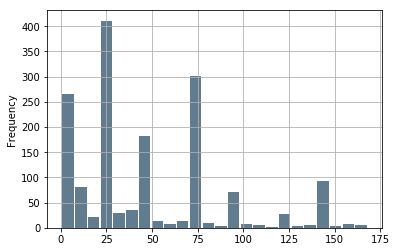

In [78]:
projectDetailsUnq["hours"].plot.hist(grid=True, bins=24, rwidth=0.9,
                   color='#607c8e')

### How many observations are recorded per bioblitz?

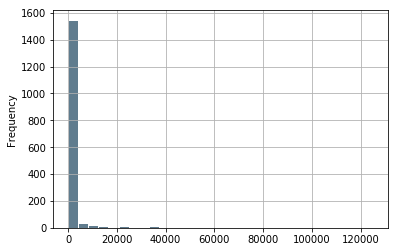

In [79]:
projectDetailsUnq["observations"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

### How many observers per bioblitz?

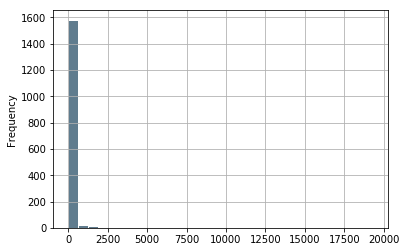

In [80]:
projectDetailsUnq["observers"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

### How many species are recorded per bioblitz?

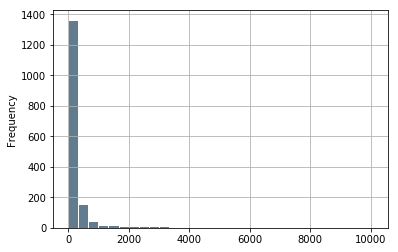

In [81]:
projectDetailsUnq["species"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

### How many identifers work on a bioblitz?

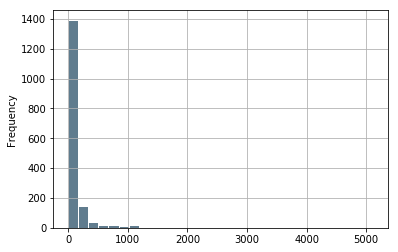

In [82]:
projectDetailsUnq["identifiers"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

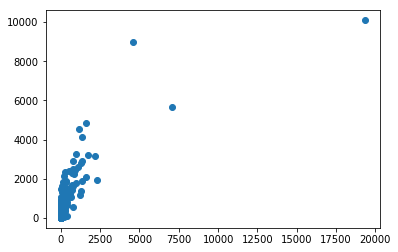

In [83]:
plt.scatter(projectDetailsUnq["observers"],projectDetailsUnq["species"])

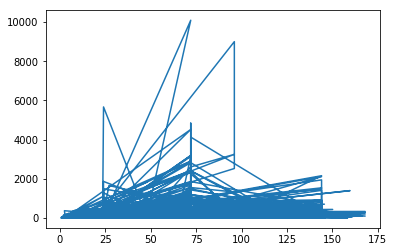

In [84]:
plt.plot(projectDetailsUnq["hours"],projectDetailsUnq["species"])